# Jay Bhanushali (60009200047)

1. Multiple BoxPlot
https://colab.research.google.com/drive/1Is71dmrj7Q4SEVvTO6cC3or4_leiEsCJ?usp=sharing 

 

2. Seasonality using Autocorrelation Plot
https://colab.research.google.com/drive/1_gdZfSkwDQ2dxUXK98akPnUgYhFNGOrR?usp=sharing 

 

3. Deseasoning of Time-Series Data:

 

https://colab.research.google.com/drive/1YrKOqIgjmPAaoBsVbWU7MsfOjXTbW05t?usp=sharing 

 

4. Seasonal Decomposition

 

1. https://colab.research.google.com/drive/1NQBp_t5iWFym2jAwpE8rJO4DDjWK_TlC?usp=sharing - scratch
2. https://colab.research.google.com/drive/1J-NWssNeZRH3DXBzp0XGEsOOUmHhKiIx?usp=sharing - library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# !pip install --upgrade xlrd
# Uncomment if xlrd is required

In [3]:
# !pip install pandas
# uncomment if latest version of pandas is to be installed

# FB

## 1. Multiple BoxPlot

In [4]:
df = pd.read_csv('../Dataset/FB.csv')
df.head(3)

,Date,ID,Close,Low,High,Volume,C(t-5),C(t-4),C(t-3),C(t-2),...,CCI200-200,ADO>ADOt-1,HIS,DAX,AORD,N100,N225,SP500,SSE,Closing_Direction
0,2012-07-09,41099,31.730000,31.26,31.900000,10945600,31.10,30.77,31.20,31.47,...,1,0,0,0,0,0,0,0,0,1
1,2012-07-10,41100,32.169998,31.99,32.880001,17785200,30.77,31.20,31.47,31.73,...,1,0,0,1,0,1,0,0,0,0
2,2012-07-11,41101,31.469999,31.16,32.480000,14269500,31.20,31.47,31.73,32.17,...,0,1,1,1,0,0,0,0,1,0


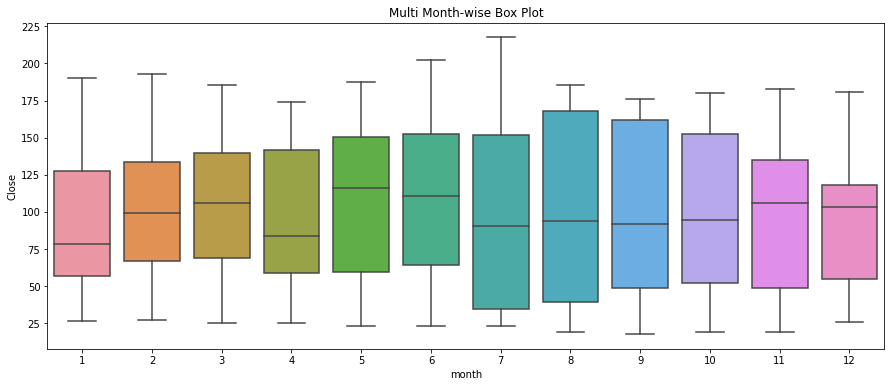

In [5]:
df['month'] = pd.to_datetime(df['Date']).dt.month
df['year'] = pd.to_datetime(df['Date']).dt.year
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='Close', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

## 2. Seasonality using Autocorrelation Plot 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

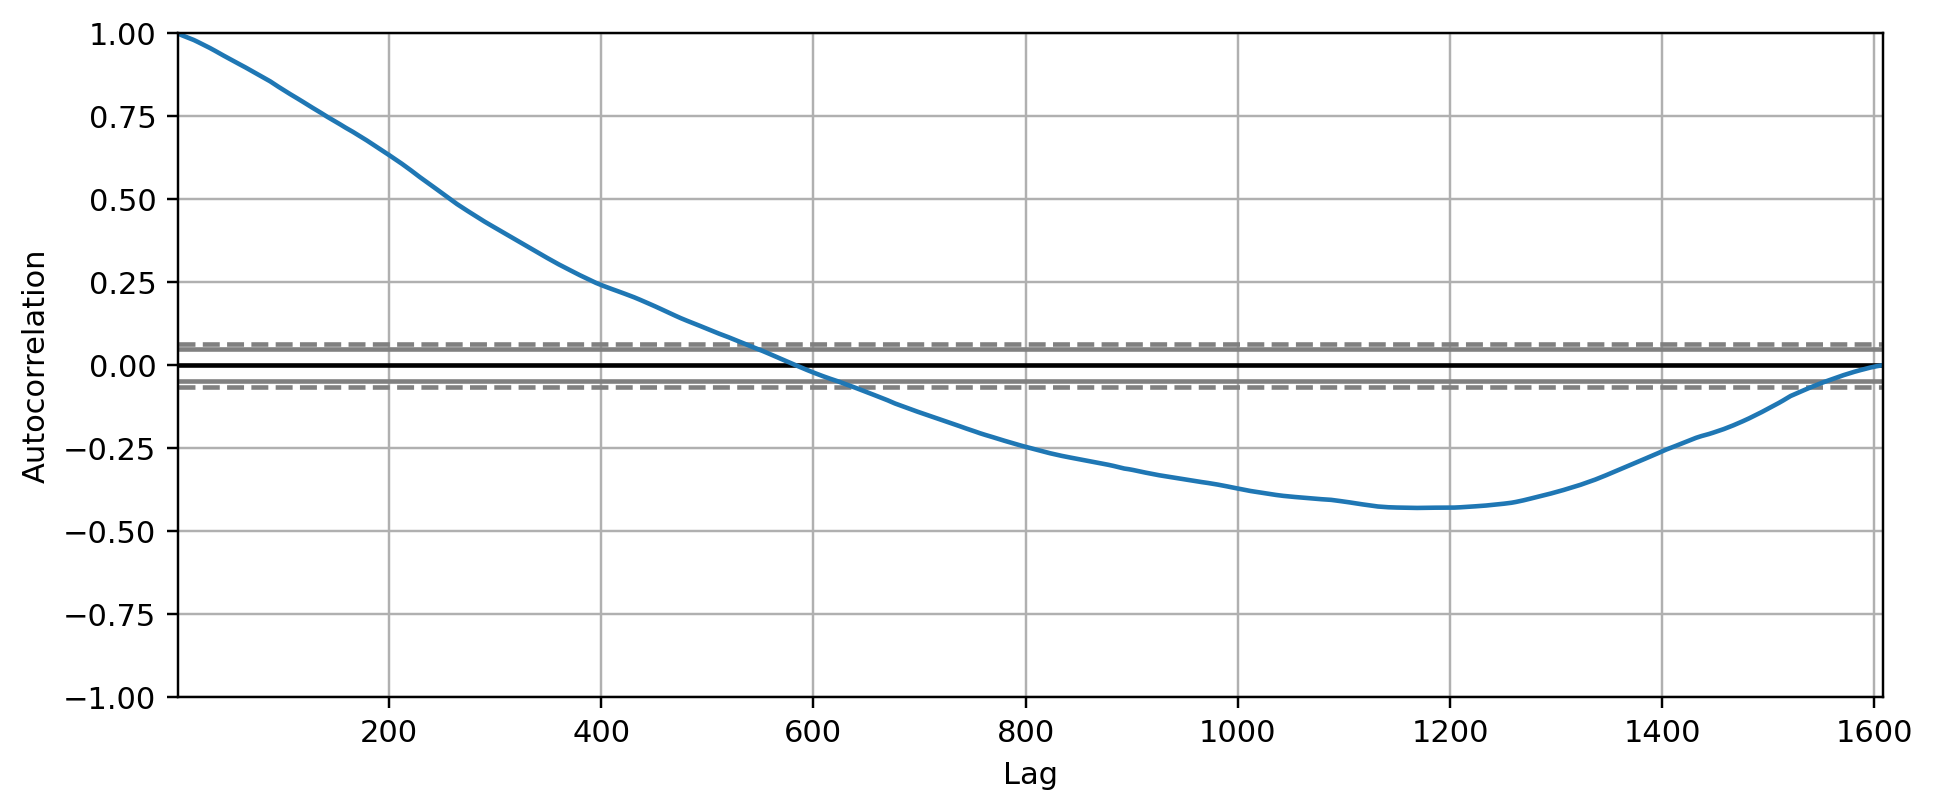

In [6]:
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':220})
autocorrelation_plot(df.Close.tolist())

## 3. Deseasoning of Time-Series Data

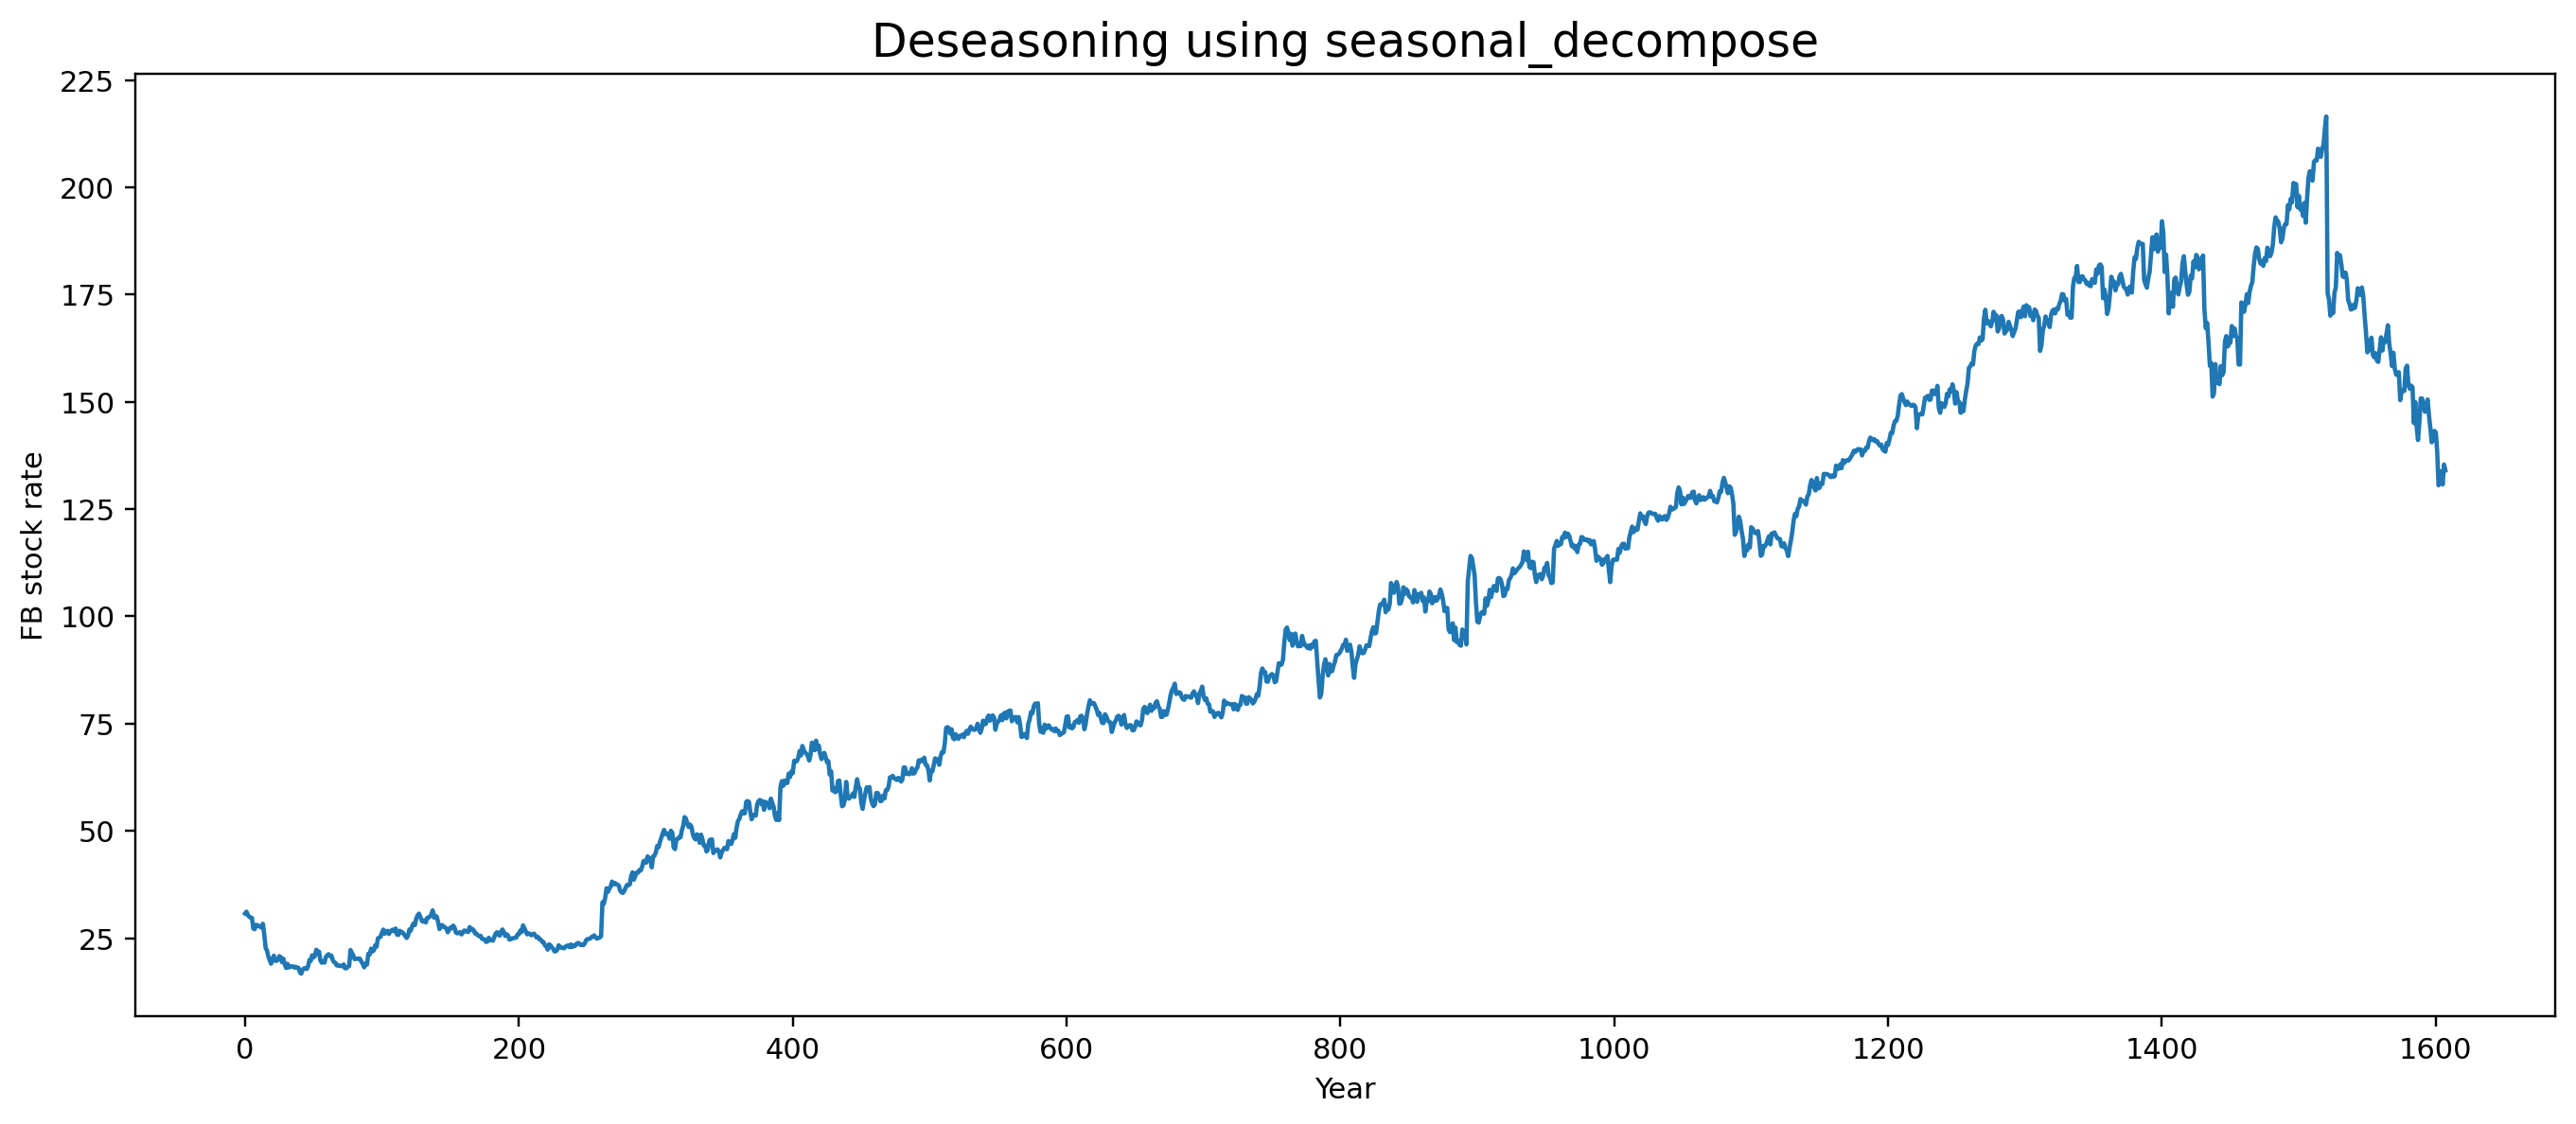

In [7]:
# Multiplicative
result_mul = seasonal_decompose(df['Close'], model='multiplicative', period=1)
deseason = df['Close'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('FB stock rate')
plt.show()

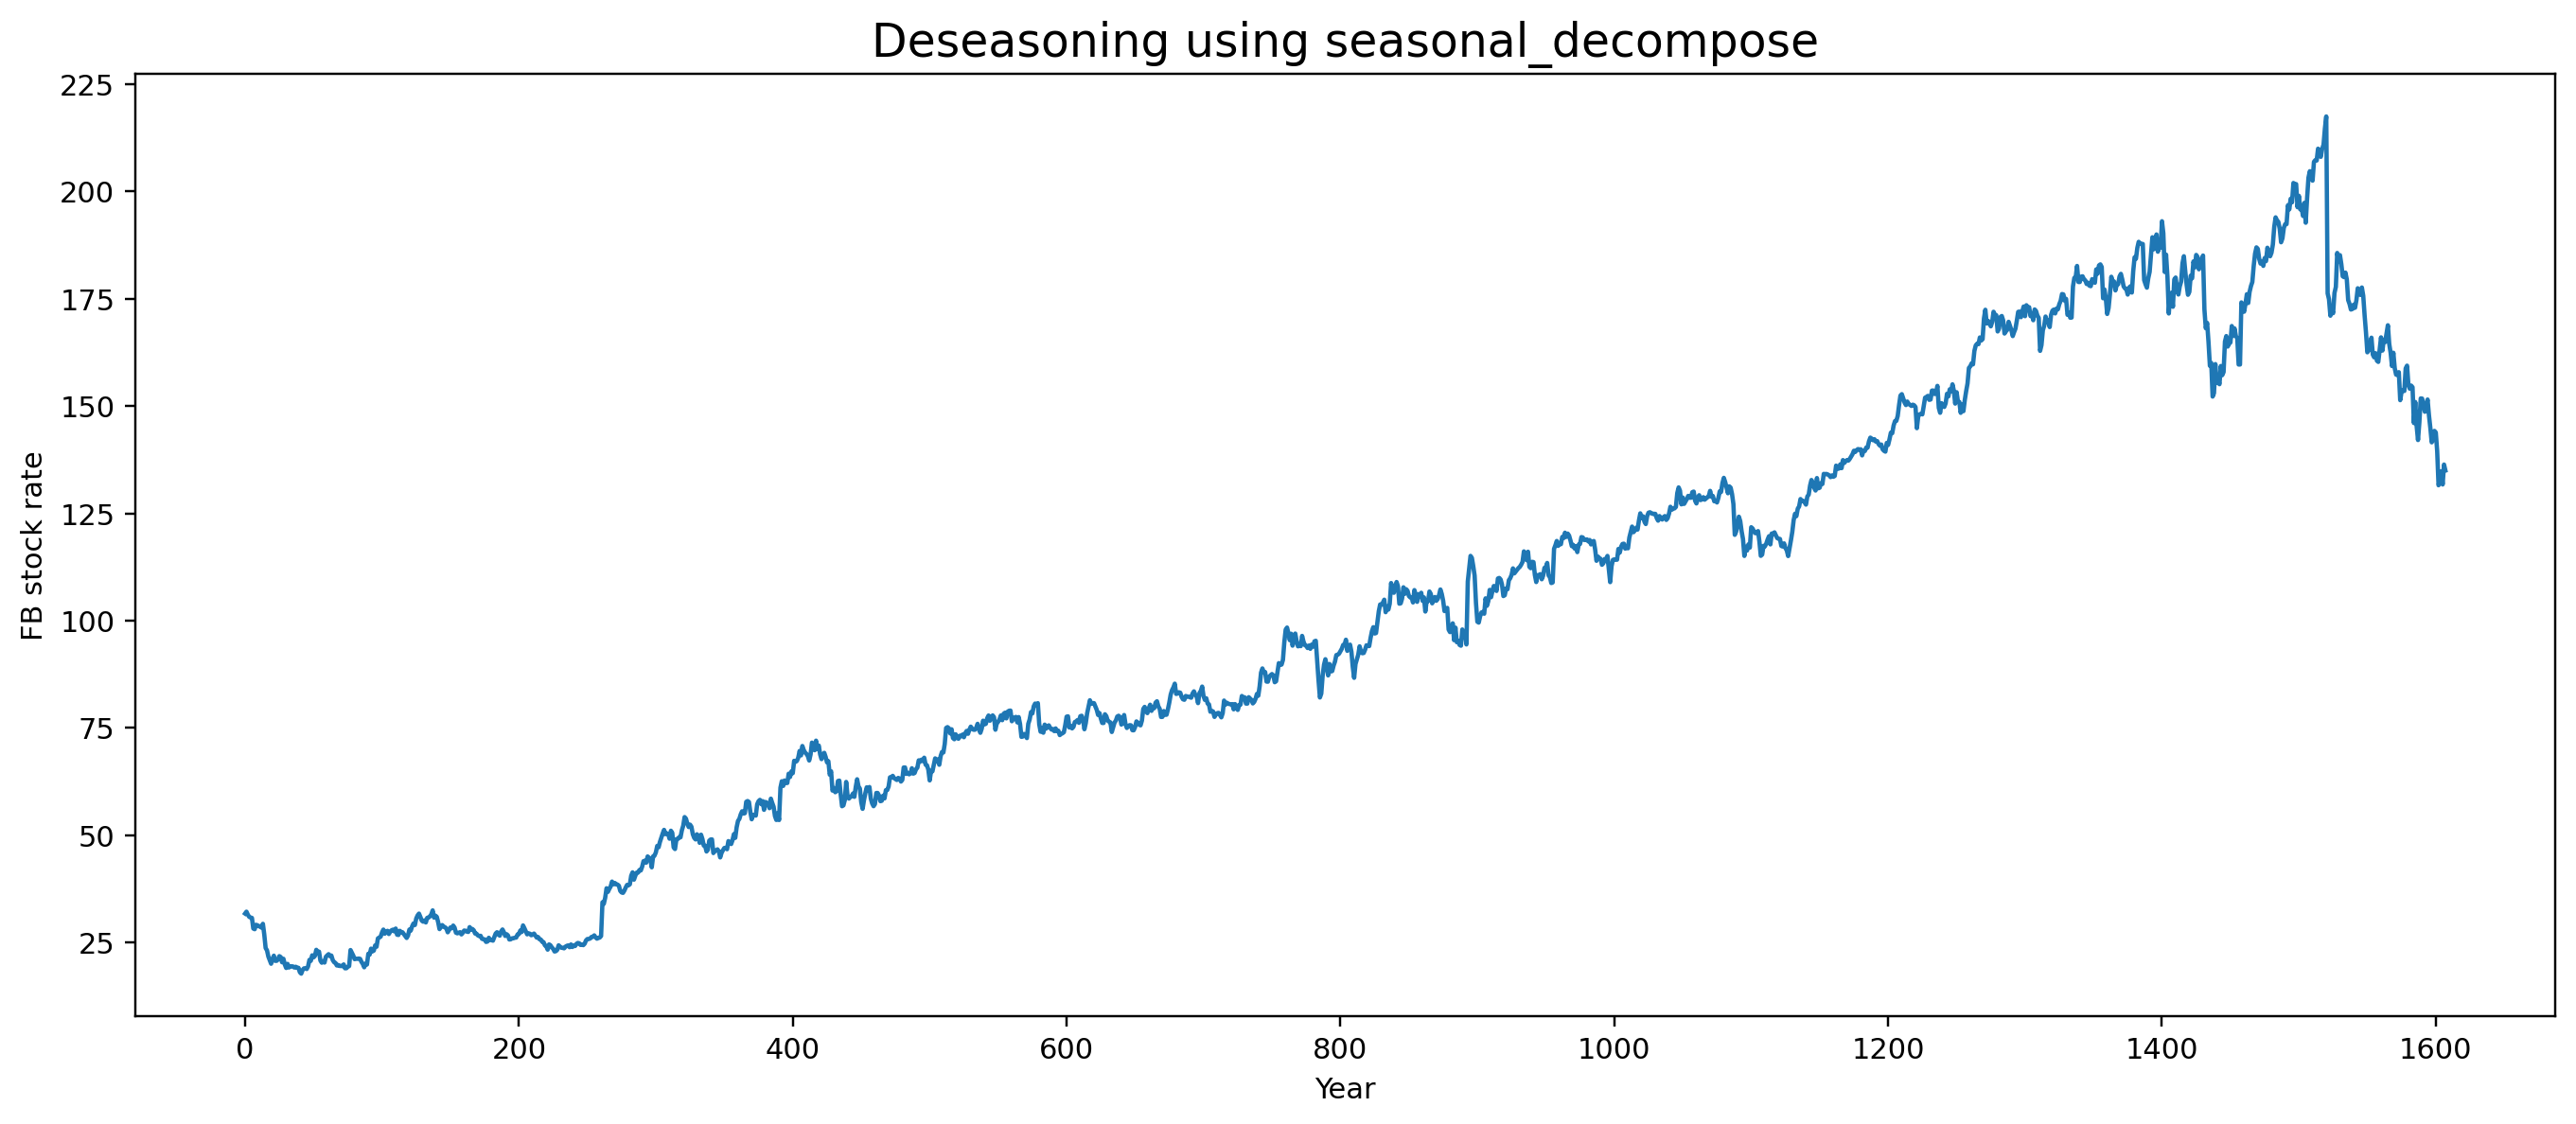

In [8]:
# Additive
result_add = seasonal_decompose(df['Close'], model='additive', period=1)
deseason = df['Close'] - result_add.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('FB stock rate')
plt.show()

## 4. Seasonal Decomposition

### From scratch

In [9]:
T_Series = df.Date
T_Series_for_sine = pd.to_datetime(df.Date).dt.year
Trend = df.Close

Text(0, 0.5, 'product demand')

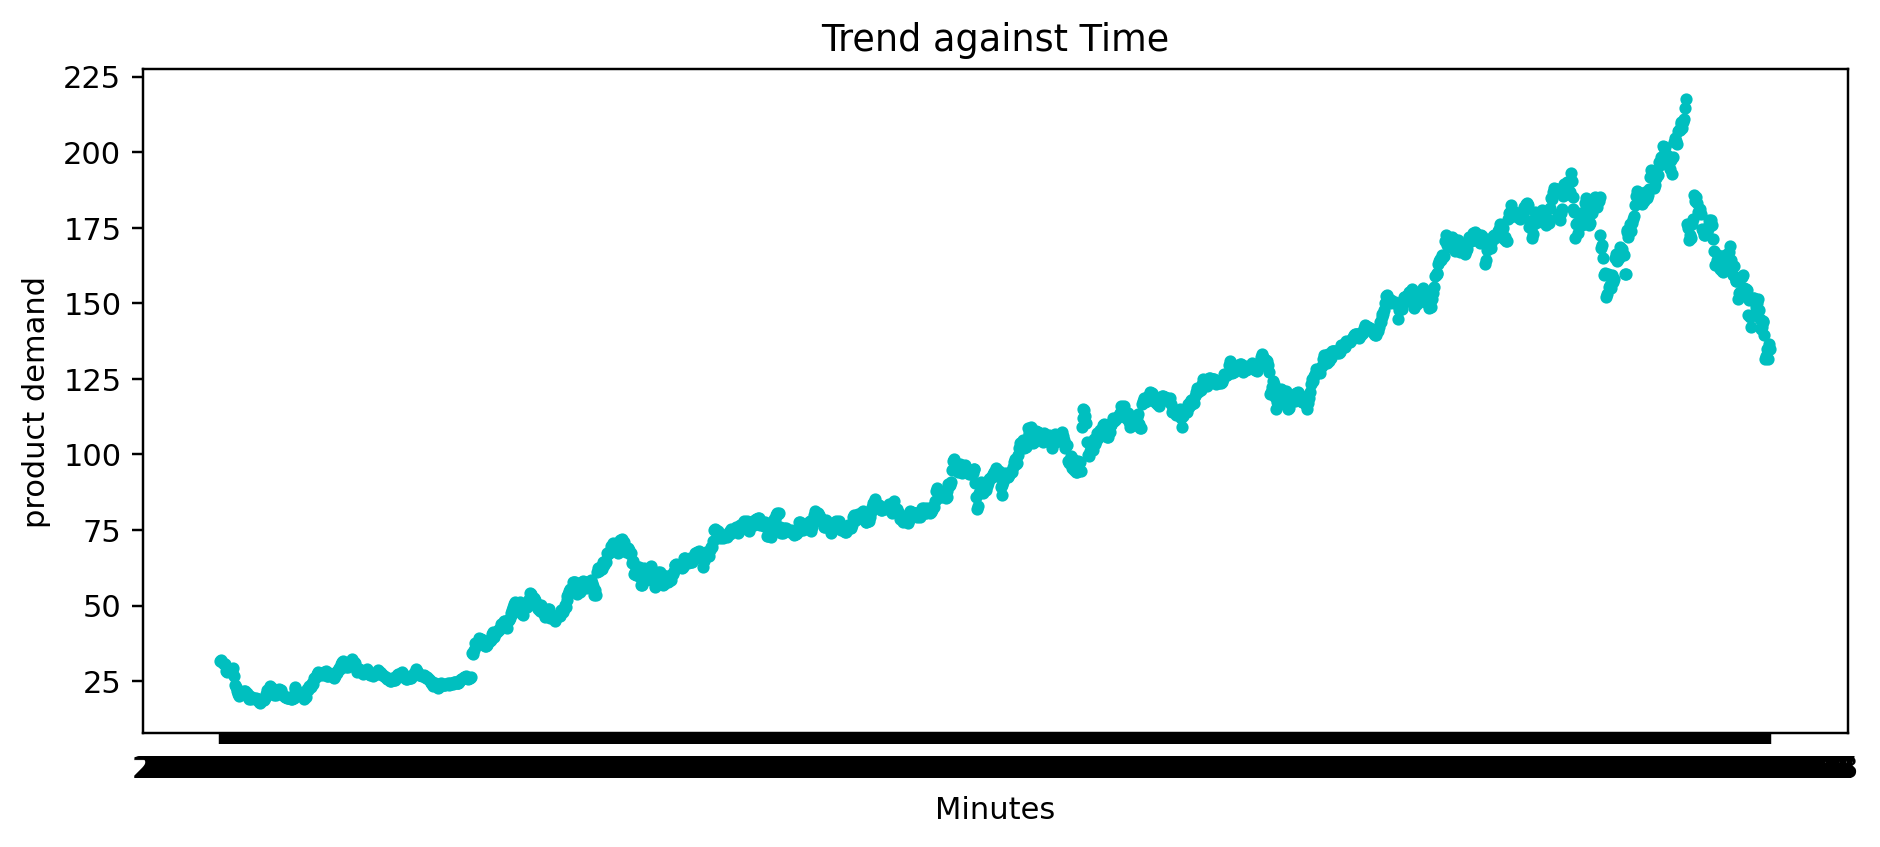

In [10]:
#plot the trend
plt.plot(T_Series, Trend, 'c.')
plt.title("Trend against Time")
plt.xlabel("Minutes")
plt.ylabel("product demand")

Text(0, 0.5, 'product demand')

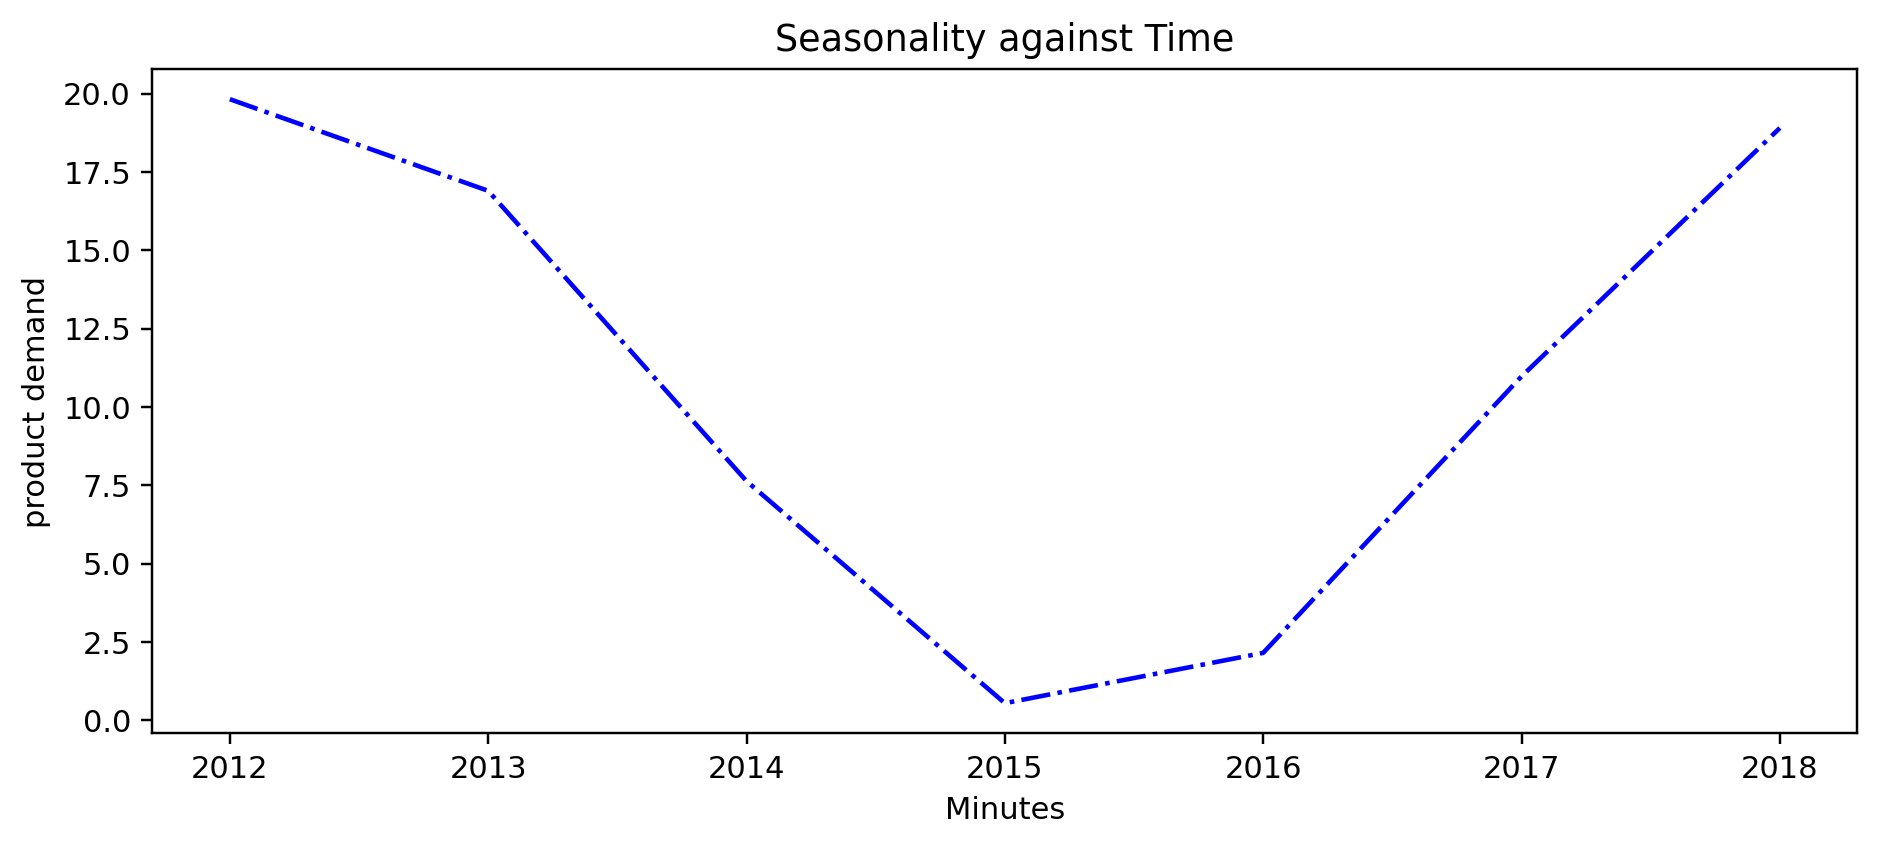

In [11]:
# creating the seasonality component
seasonality = 10 + np.sin(T_Series_for_sine) * 10

#plot the seasonality trend
plt.plot(T_Series_for_sine,  seasonality, 'b-.')
plt.title("Seasonality against Time")
plt.xlabel("Minutes")
plt.ylabel("product demand")

Text(0, 0.5, 'Product demand')

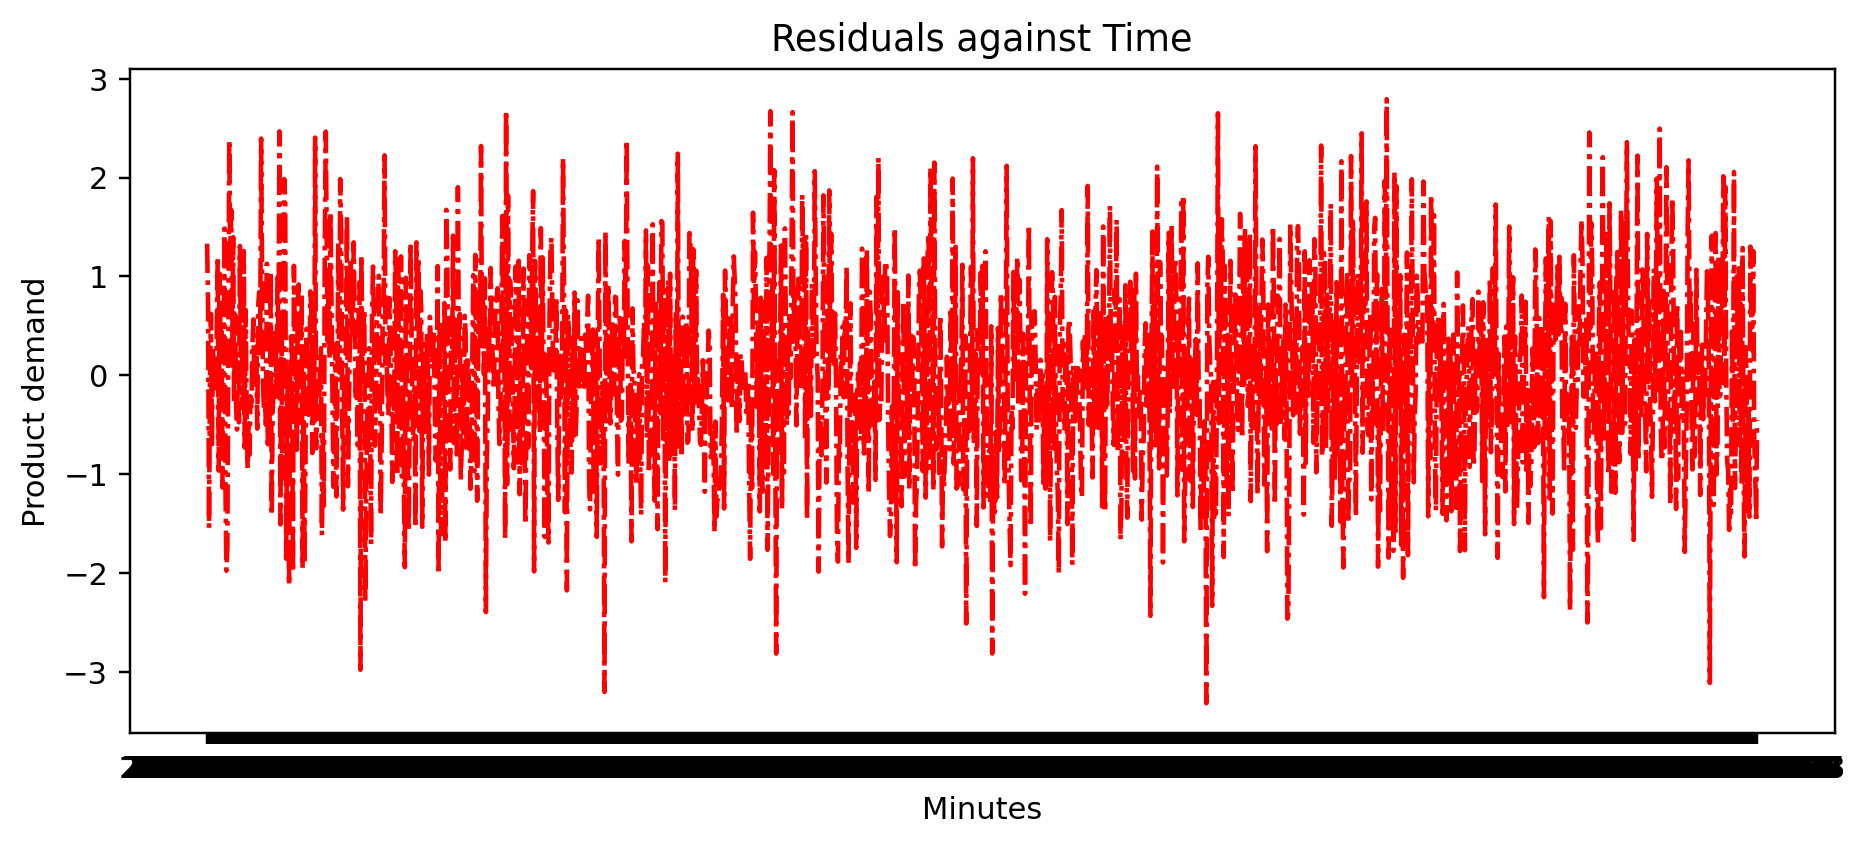

In [12]:
#creating the residual component
np.random.seed(10)  # for result reproducibility
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series))

#plot the residual component 
plt.plot(T_Series, residual, 'r-.')
plt.title("Residuals against Time")
plt.xlabel("Minutes")
plt.ylabel("Product demand")

Text(0, 0.5, 'product demand')

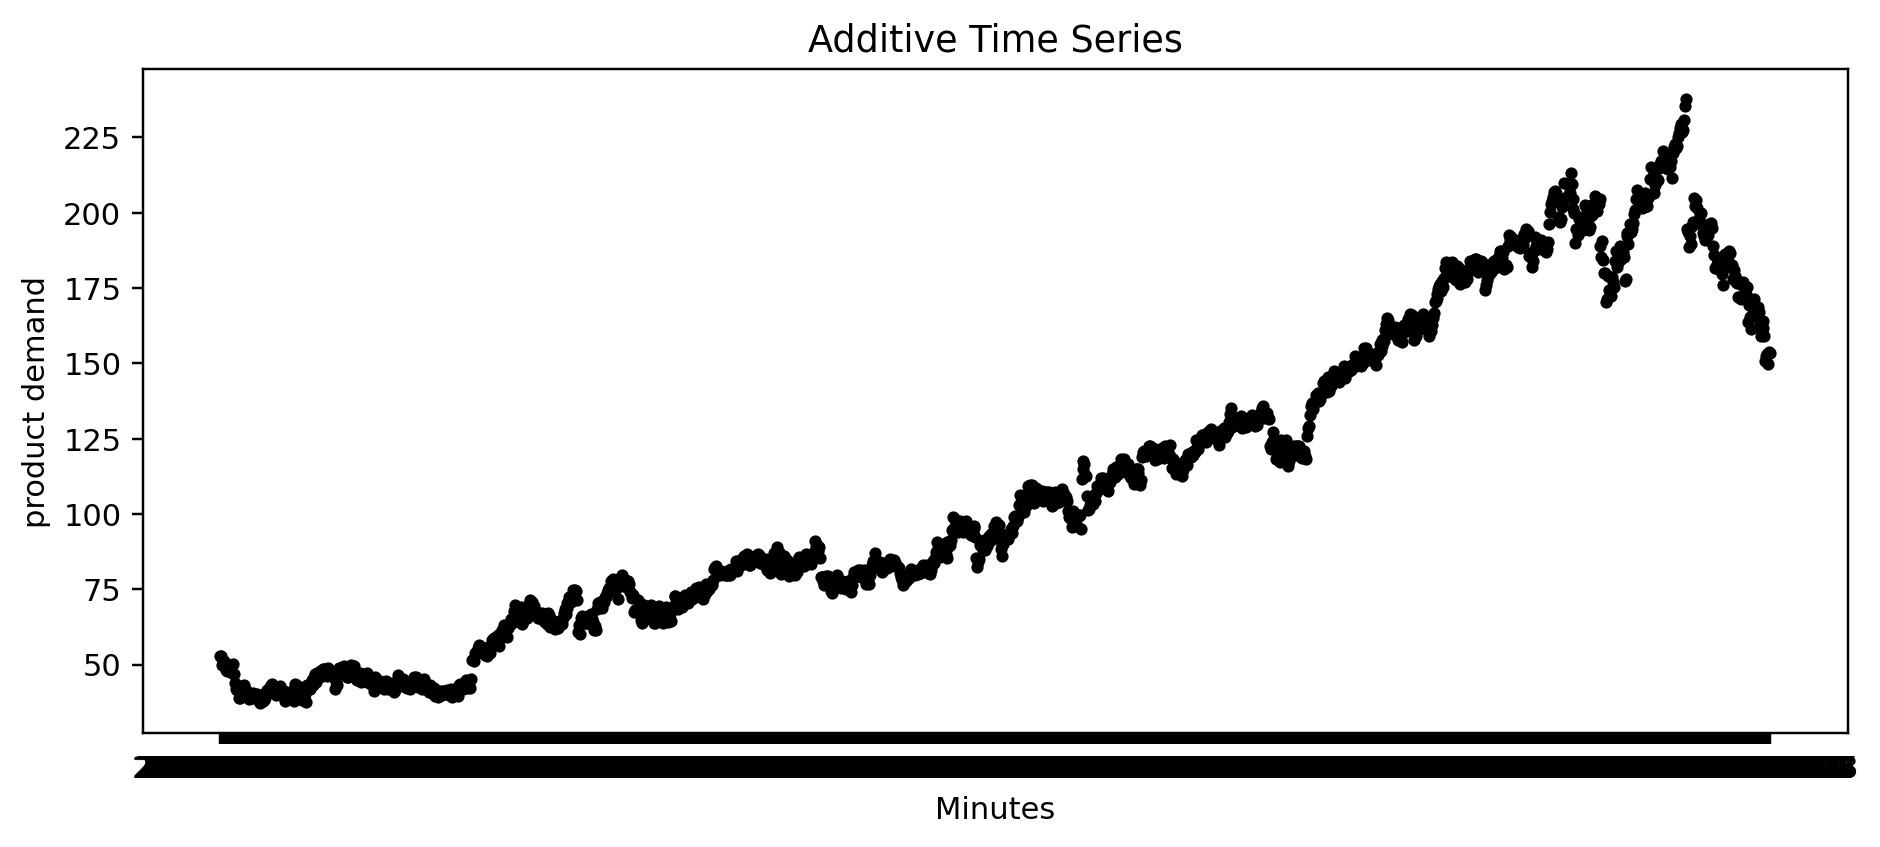

In [13]:
#create an additive model of our time series
additive_Tmodel = Trend + seasonality + residual

#Plot the additive model
plt.plot(T_Series, additive_Tmodel, 'k.')
plt.title("Additive Time Series")
plt.xlabel("Minutes")
plt.ylabel("product demand")

Text(0, 0.5, 'product demand')

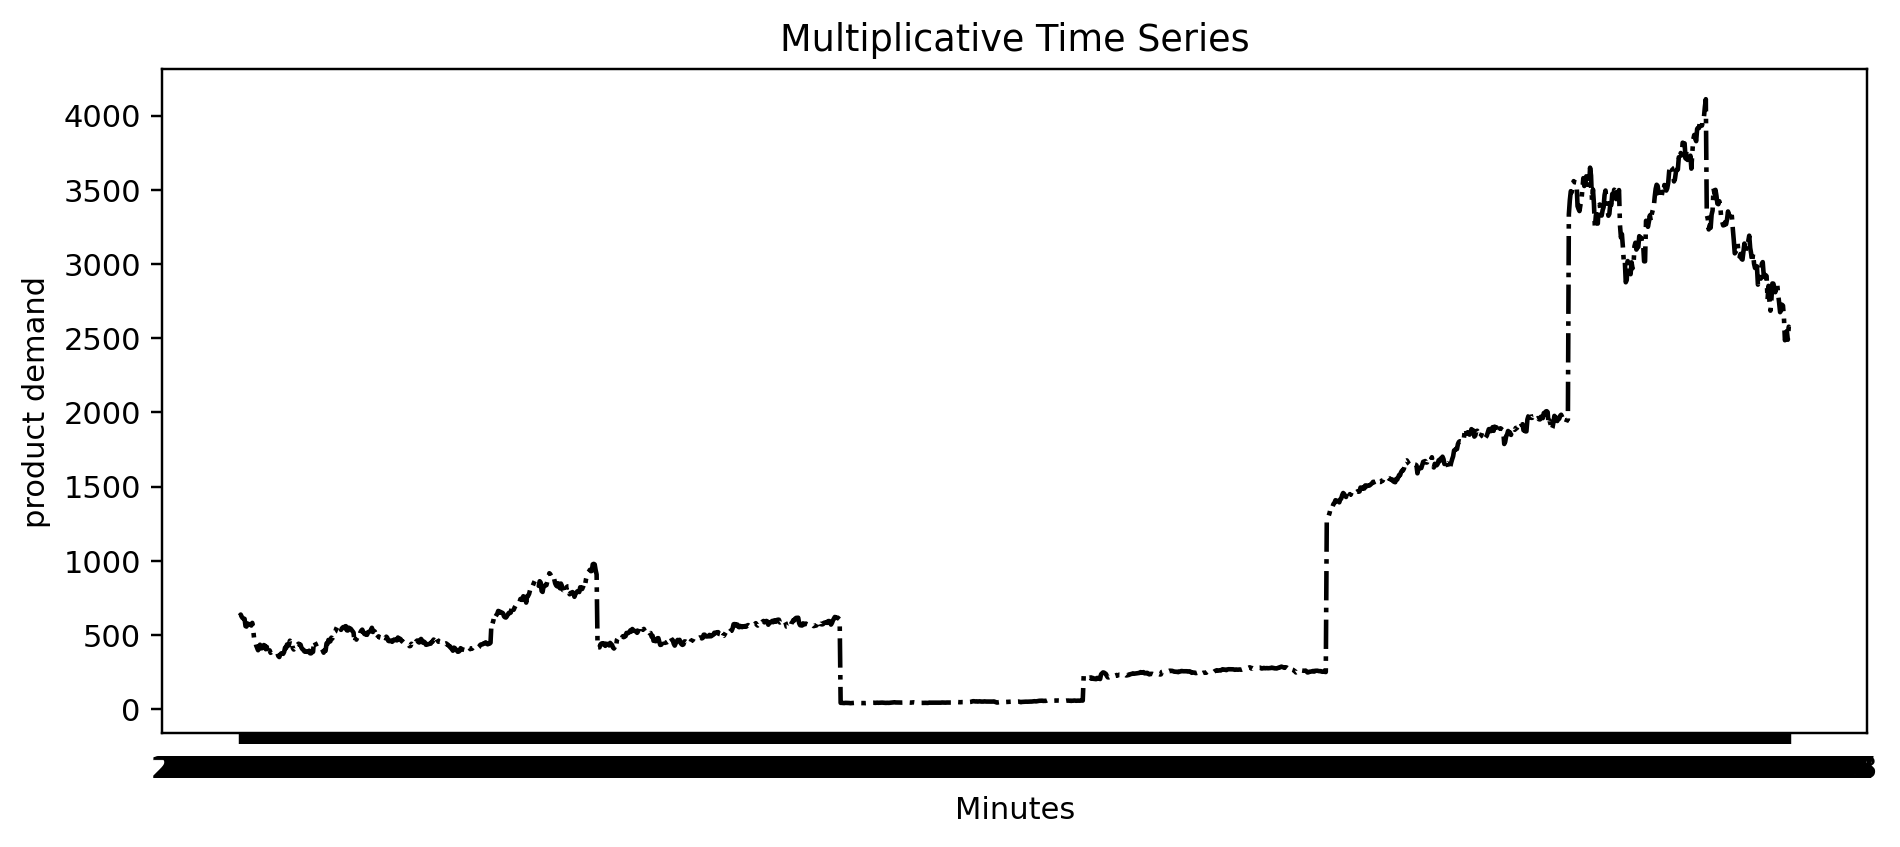

In [14]:
#create a multiplicative time series
# we ignore residual to make the pattern more apparent
ignored_residual = np.ones_like(residual)
# we multiply other components to create a multiplicative time series
multiplicative_Tmodel = Trend * seasonality * ignored_residual

#Plot the multiplicative model
plt.plot(T_Series, multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("Minutes")
plt.ylabel("product demand")

### Using library

# India Exchange Rate Dataset (Exenus)


In [15]:
ex = pd.read_excel('../Dataset/India_Exchange_Rate_Dataset.xls')
ex.head(3)

,observation_date,EXINUS
0,1973-01-01,8.0041
1,1973-02-01,7.7538
2,1973-03-01,7.5465


## 1. Multiple BoxPlot

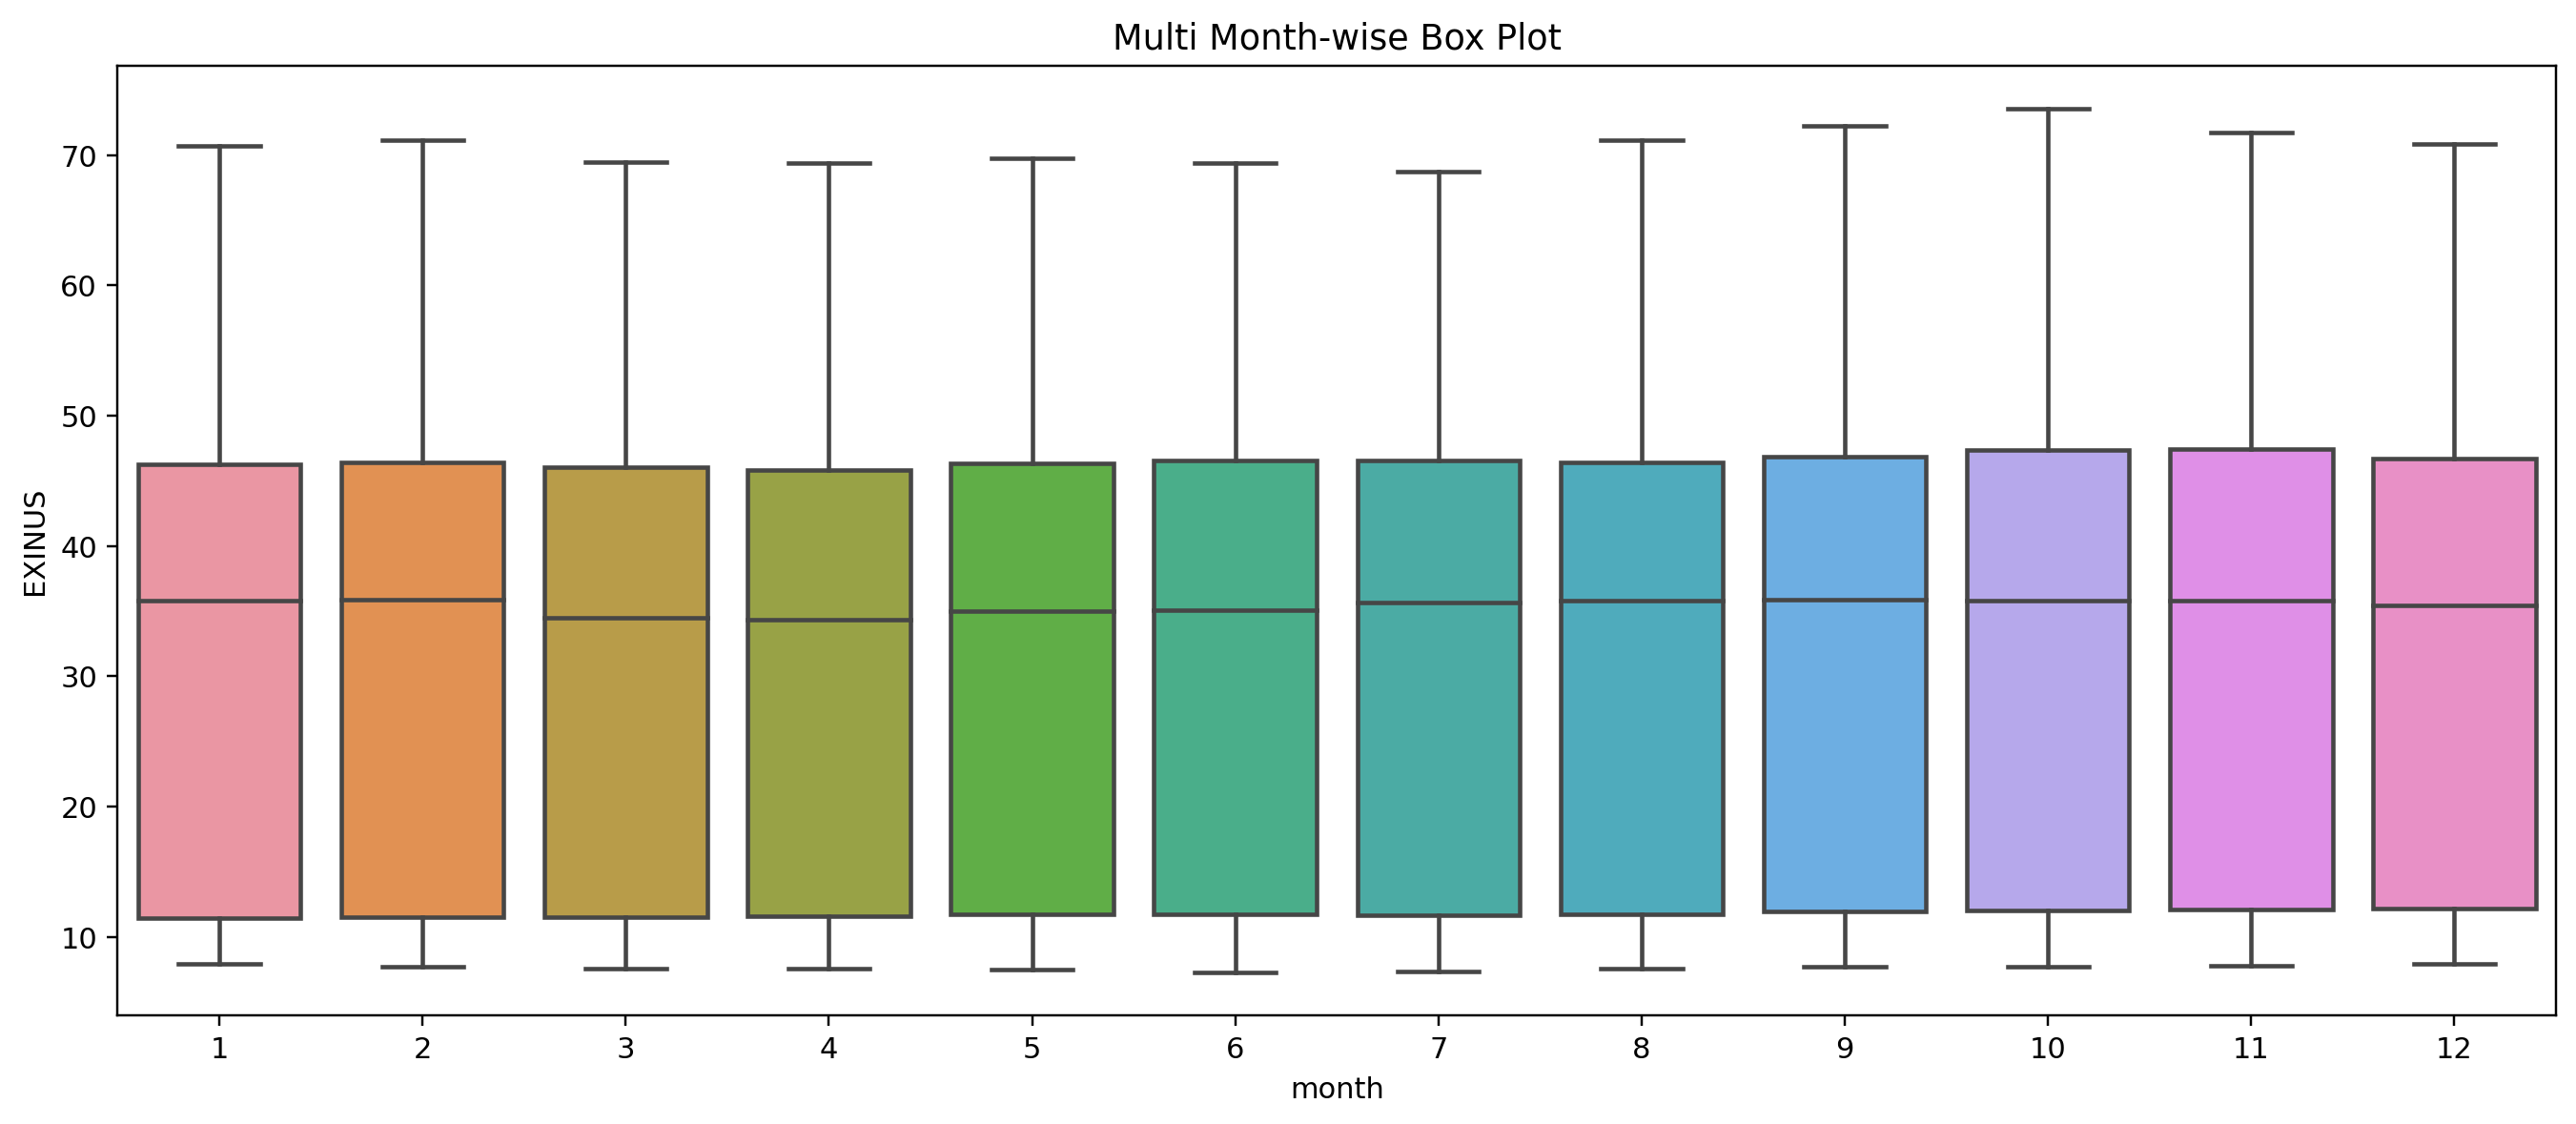

In [16]:
ex['month'] = pd.to_datetime(ex['observation_date']).dt.month
ex['year'] = pd.to_datetime(ex['observation_date']).dt.year
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='EXINUS', data=ex).set_title("Multi Month-wise Box Plot")
plt.show()

## 2. Seasonality using Autocorrelation Plot 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

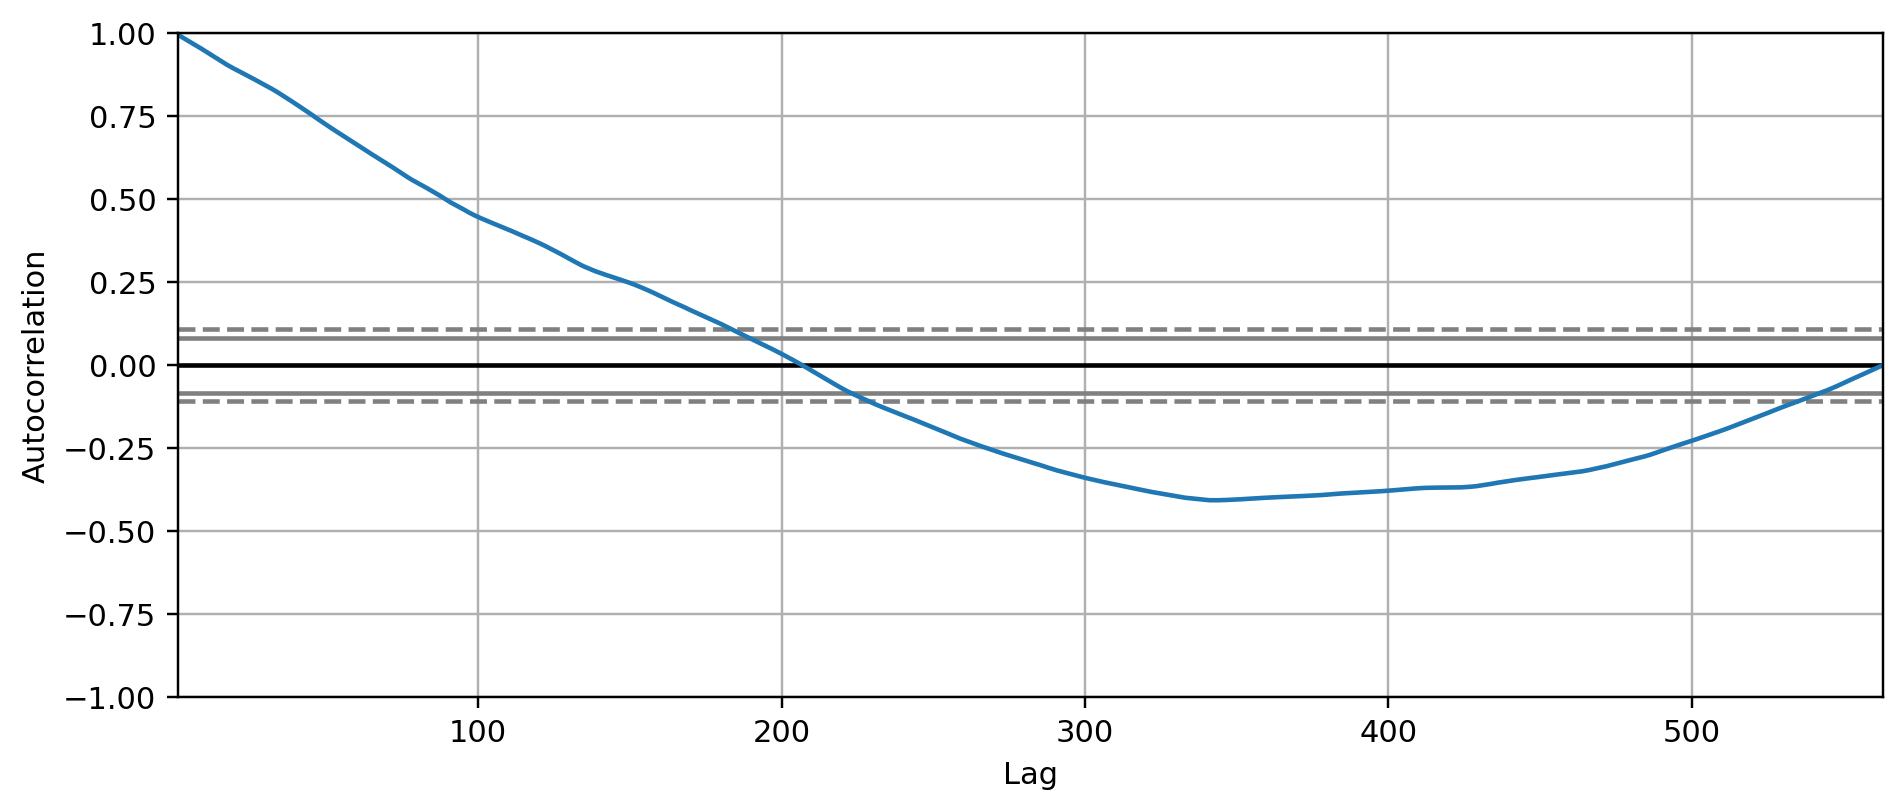

In [17]:
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':220})
autocorrelation_plot(ex.EXINUS.tolist())

## 3. Deseasoning of Time-Series Data

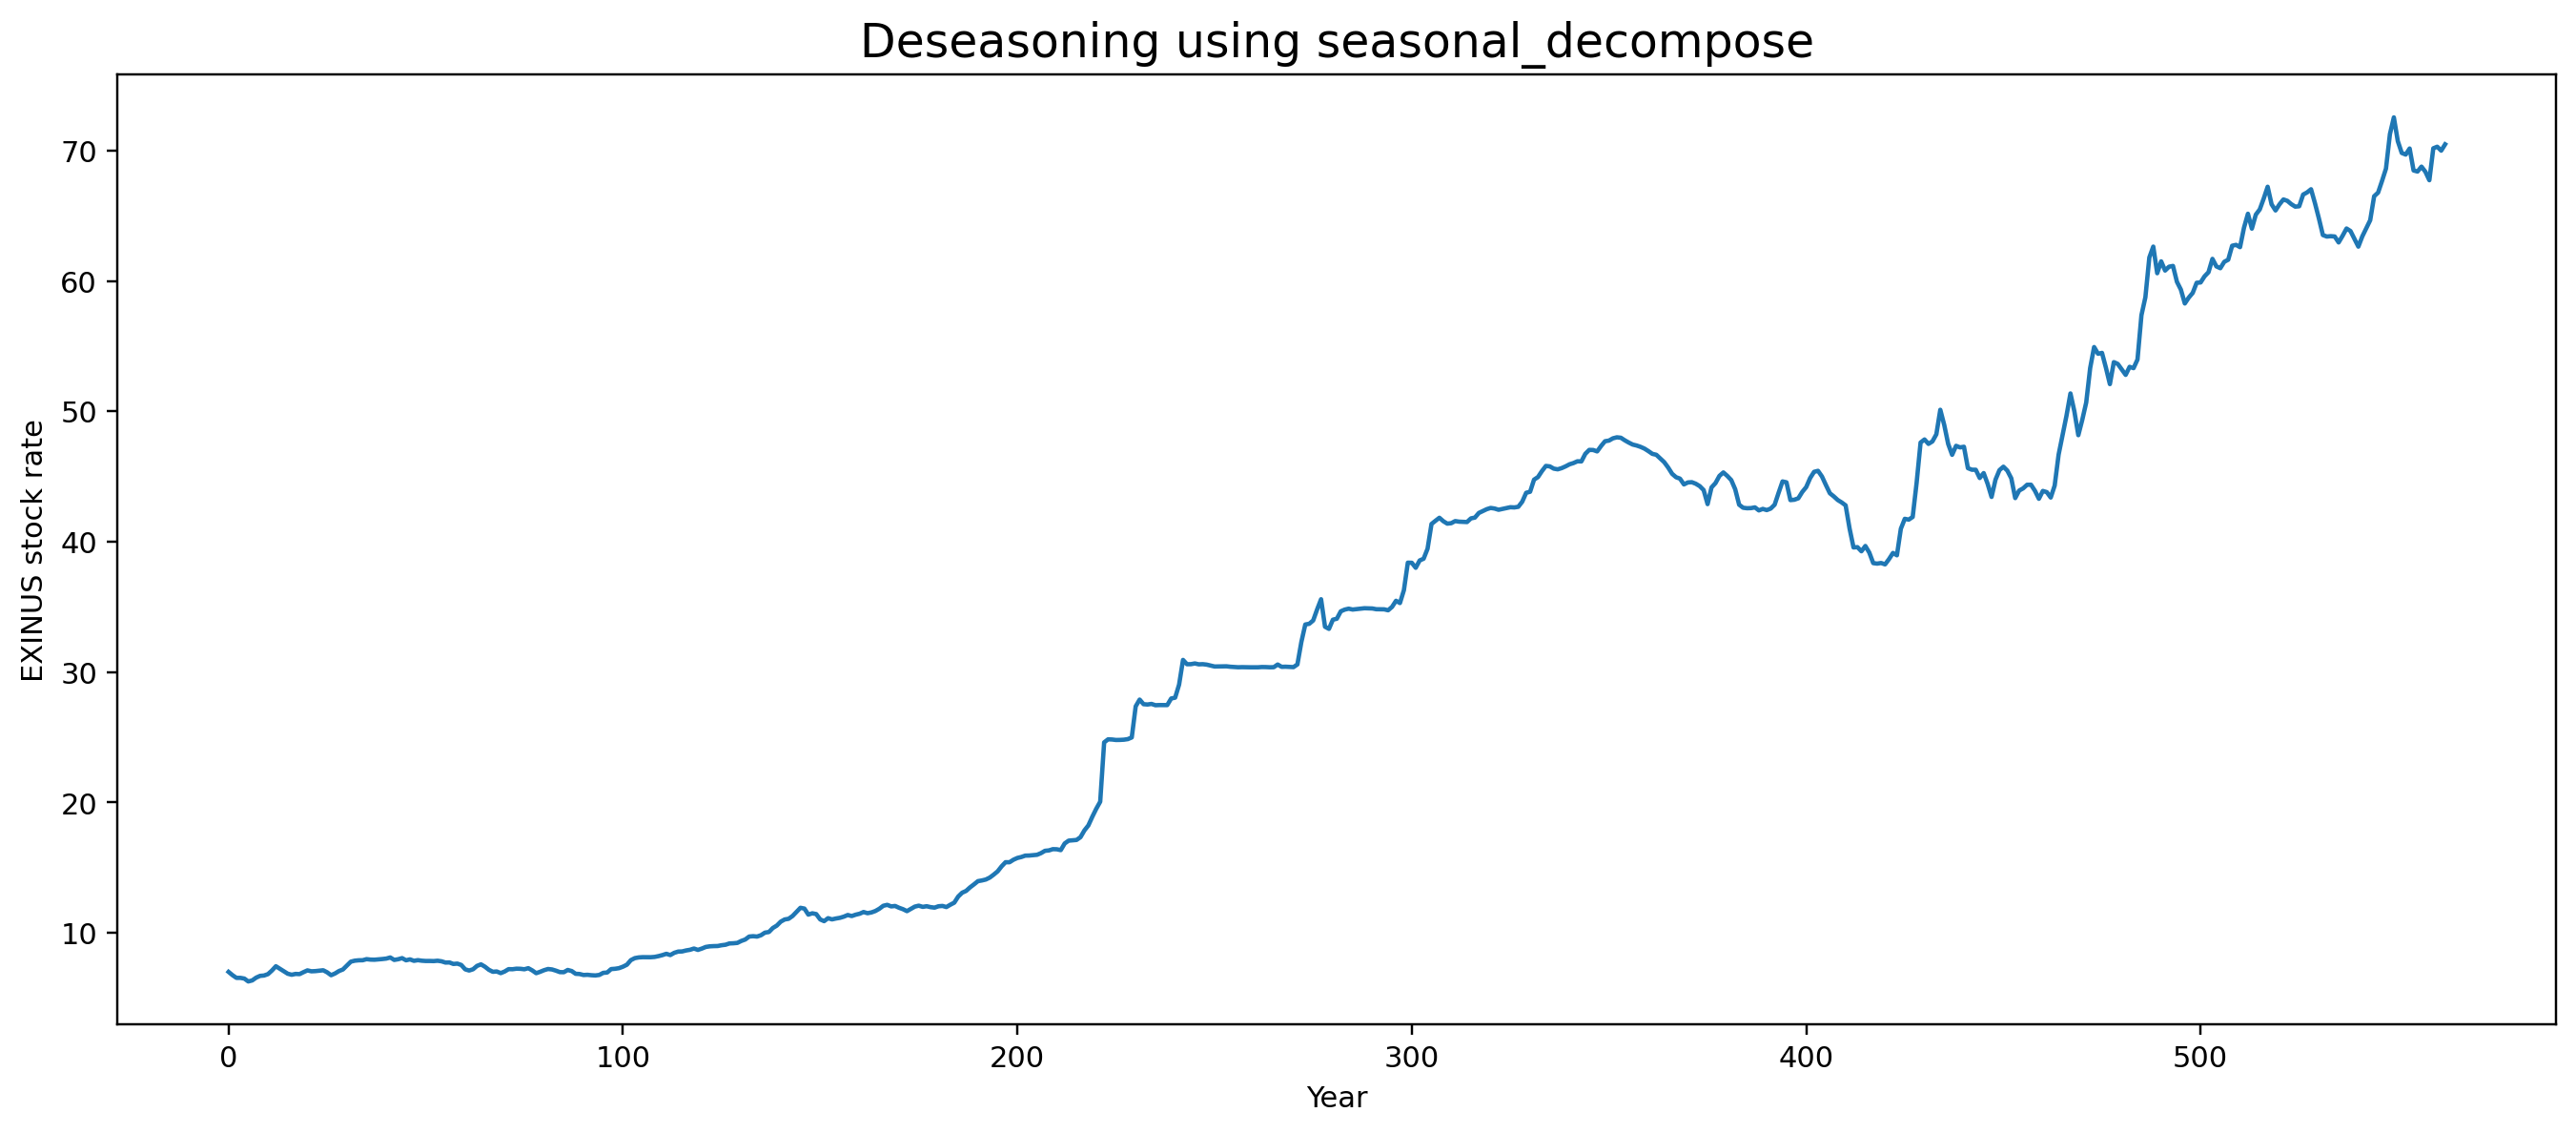

In [18]:
# Multiplicative
result_mul = seasonal_decompose(ex['EXINUS'], model='multiplicative', period=1)
deseason = ex['EXINUS'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS stock rate')
plt.show()

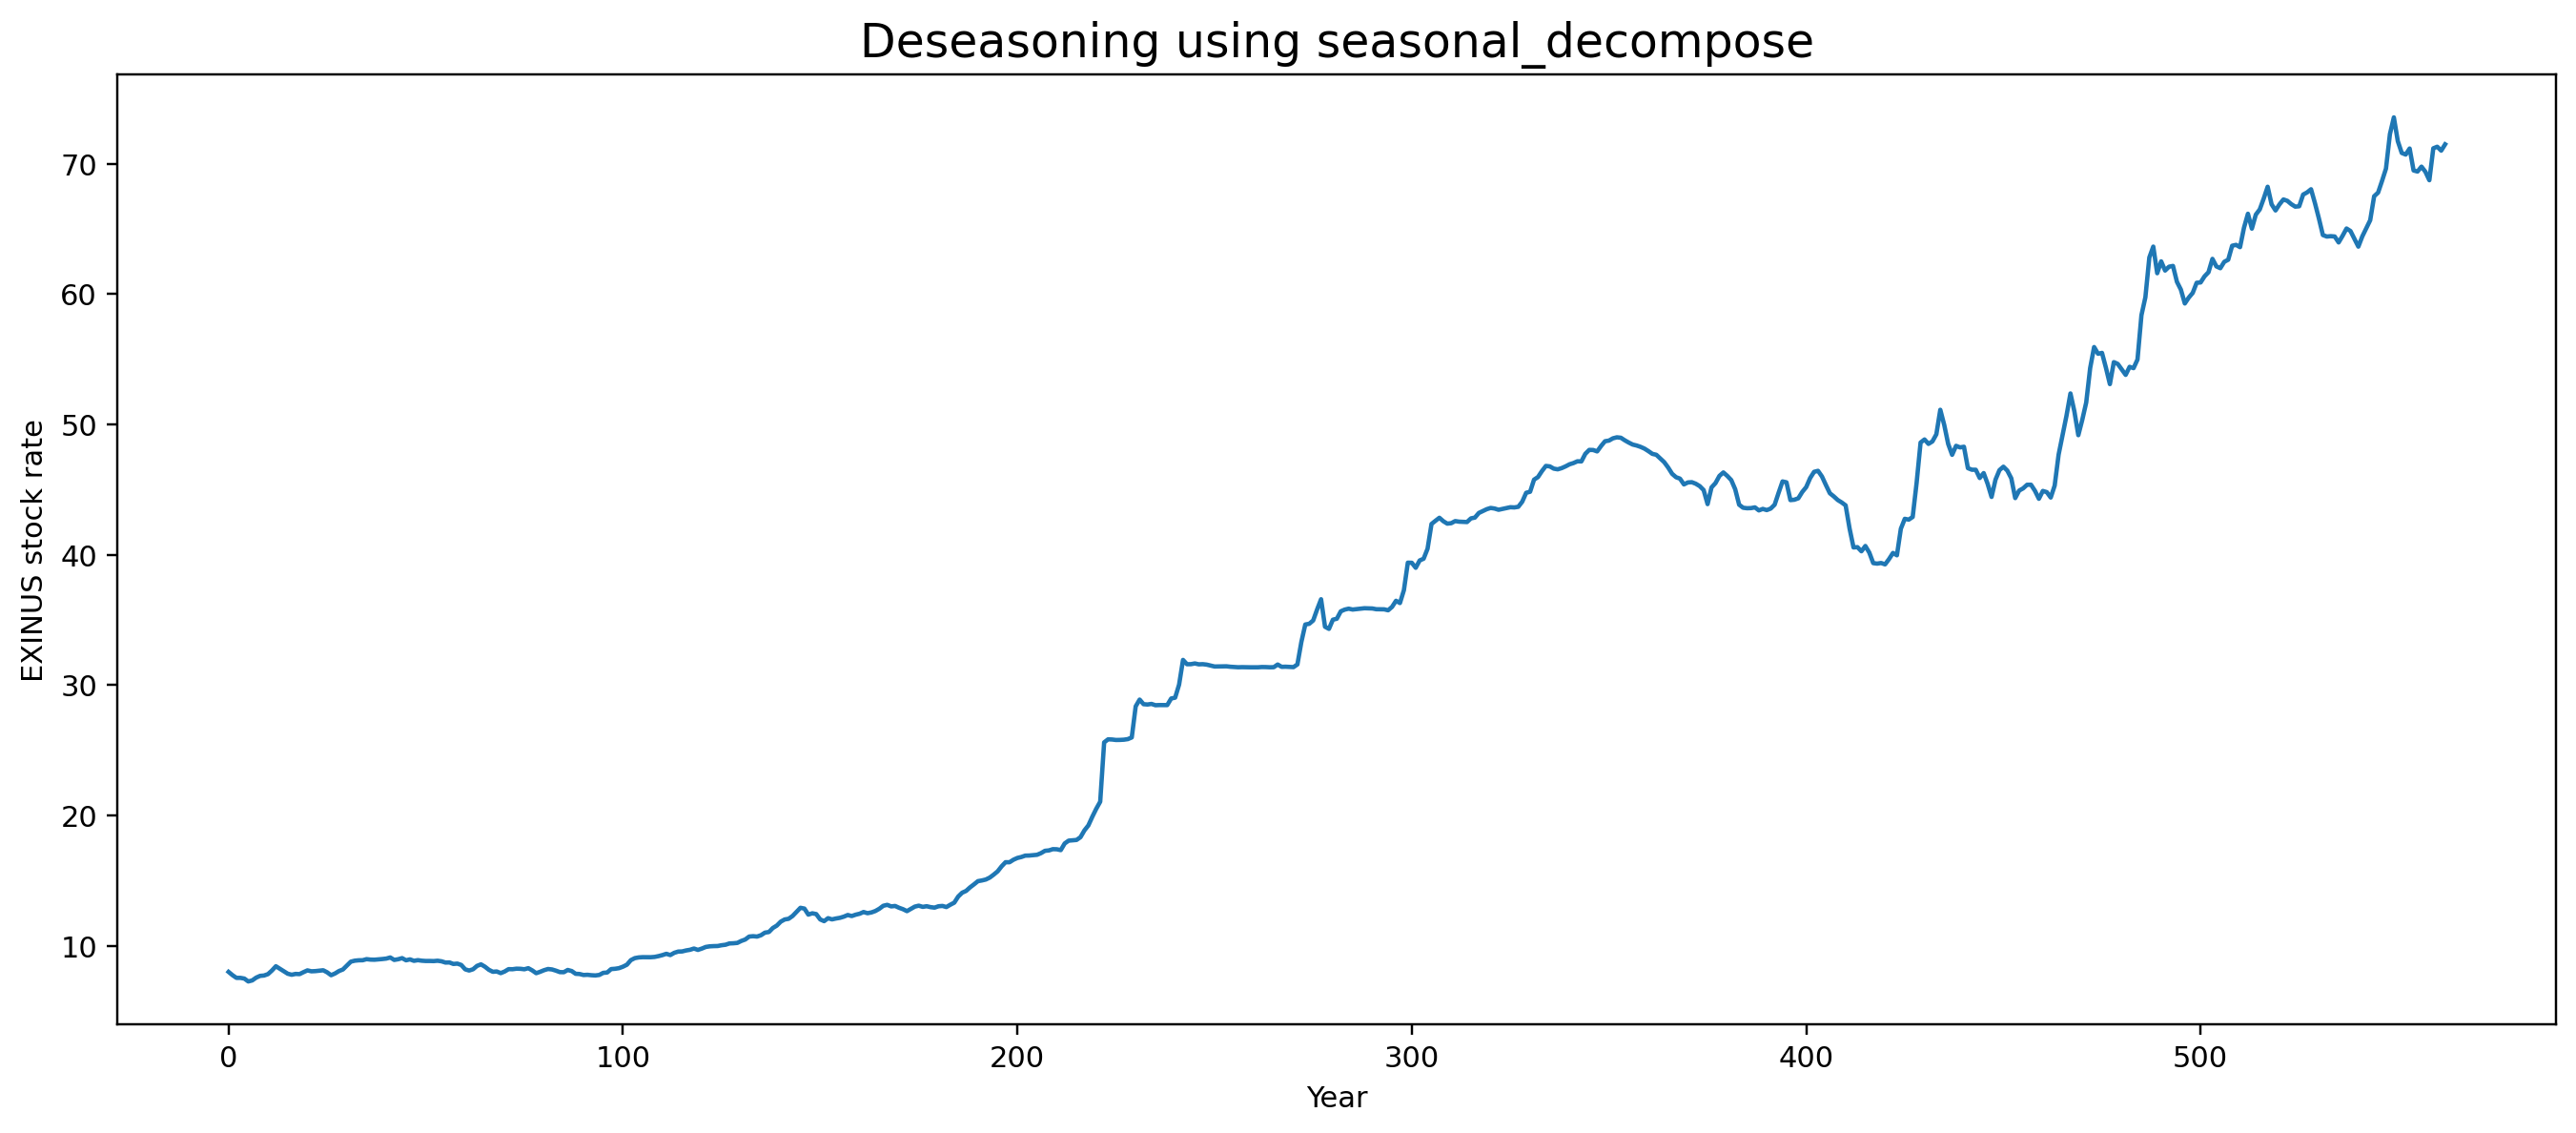

In [19]:
# Additive
result_add = seasonal_decompose(ex['EXINUS'], model='additive', period=1)
deseason = ex['EXINUS'] - result_add.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS stock rate')
plt.show()

## 4. Seasonal Decomposition

In [20]:
T_Series = ex.observation_date
T_Series_for_sine = pd.to_datetime(ex.EXINUS).dt.year
Trend = ex.EXINUS

Text(0, 0.5, 'product demand')

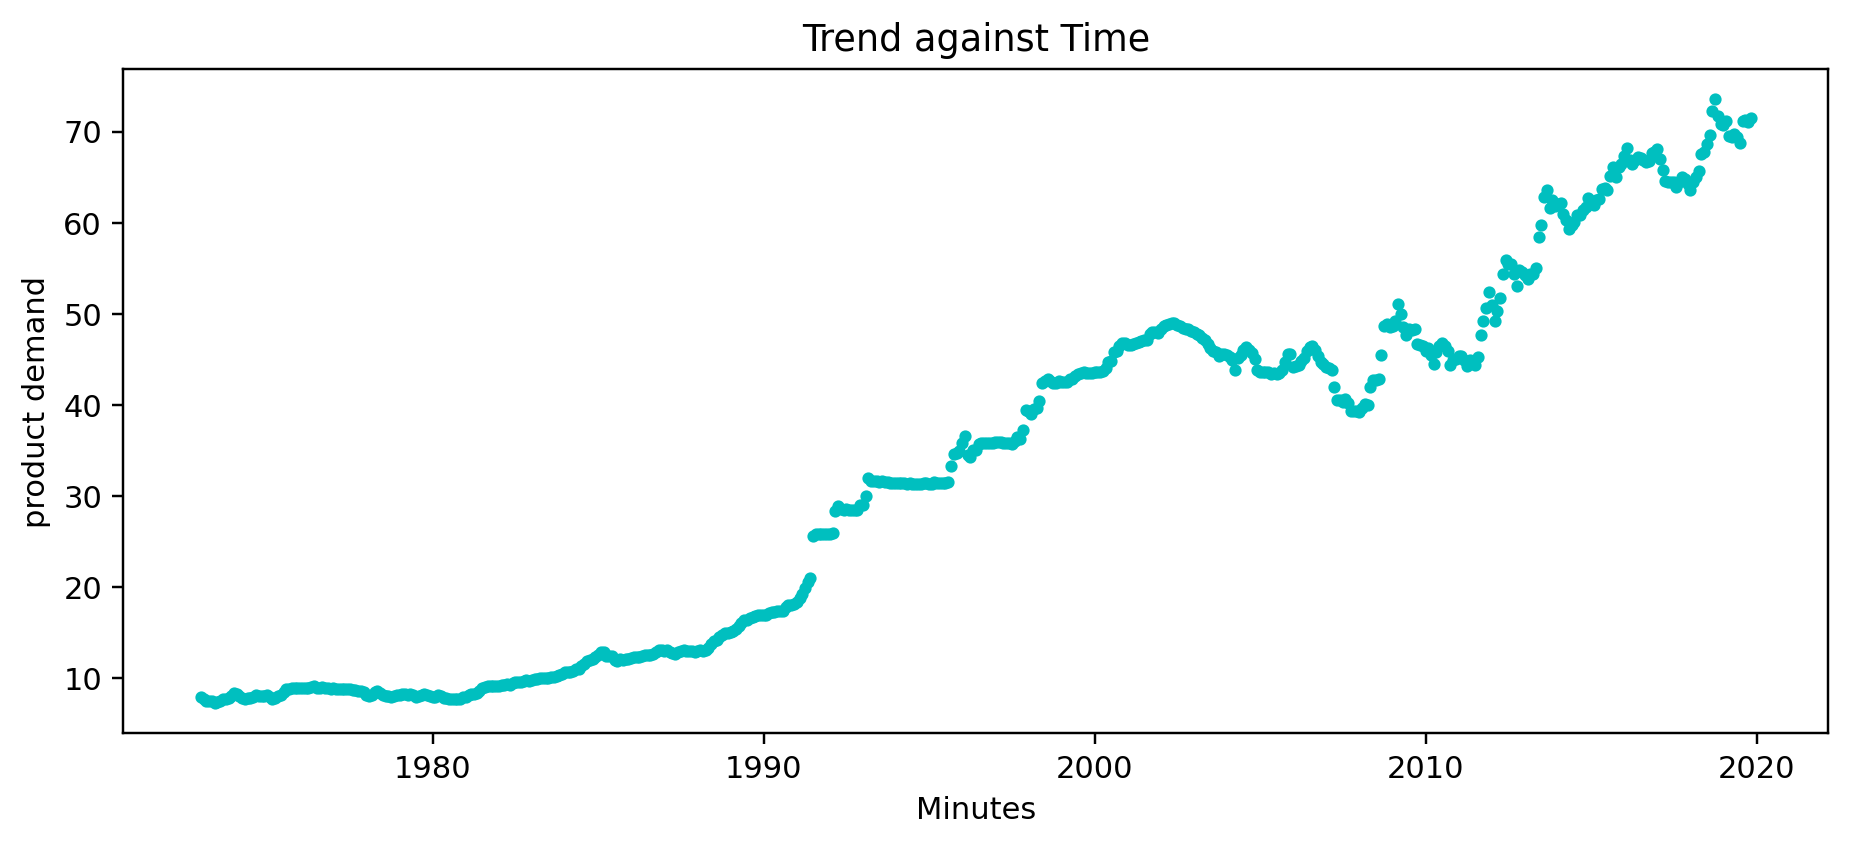

In [21]:
#plot the trend
plt.plot(T_Series, Trend, 'c.')
plt.title("Trend against Time")
plt.xlabel("Minutes")
plt.ylabel("product demand")

In [22]:
T_Series_for_sine

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
558    1970
559    1970
560    1970
561    1970
562    1970
Name: EXINUS, Length: 563, dtype: int64

In [23]:
seasonality

0       19.819864
1       19.819864
2       19.819864
3       19.819864
4       19.819864
          ...    
1603    18.900781
1604    18.900781
1605    18.900781
1606    18.900781
1607    18.900781
Name: Date, Length: 1608, dtype: float64

Text(0, 0.5, 'product demand')

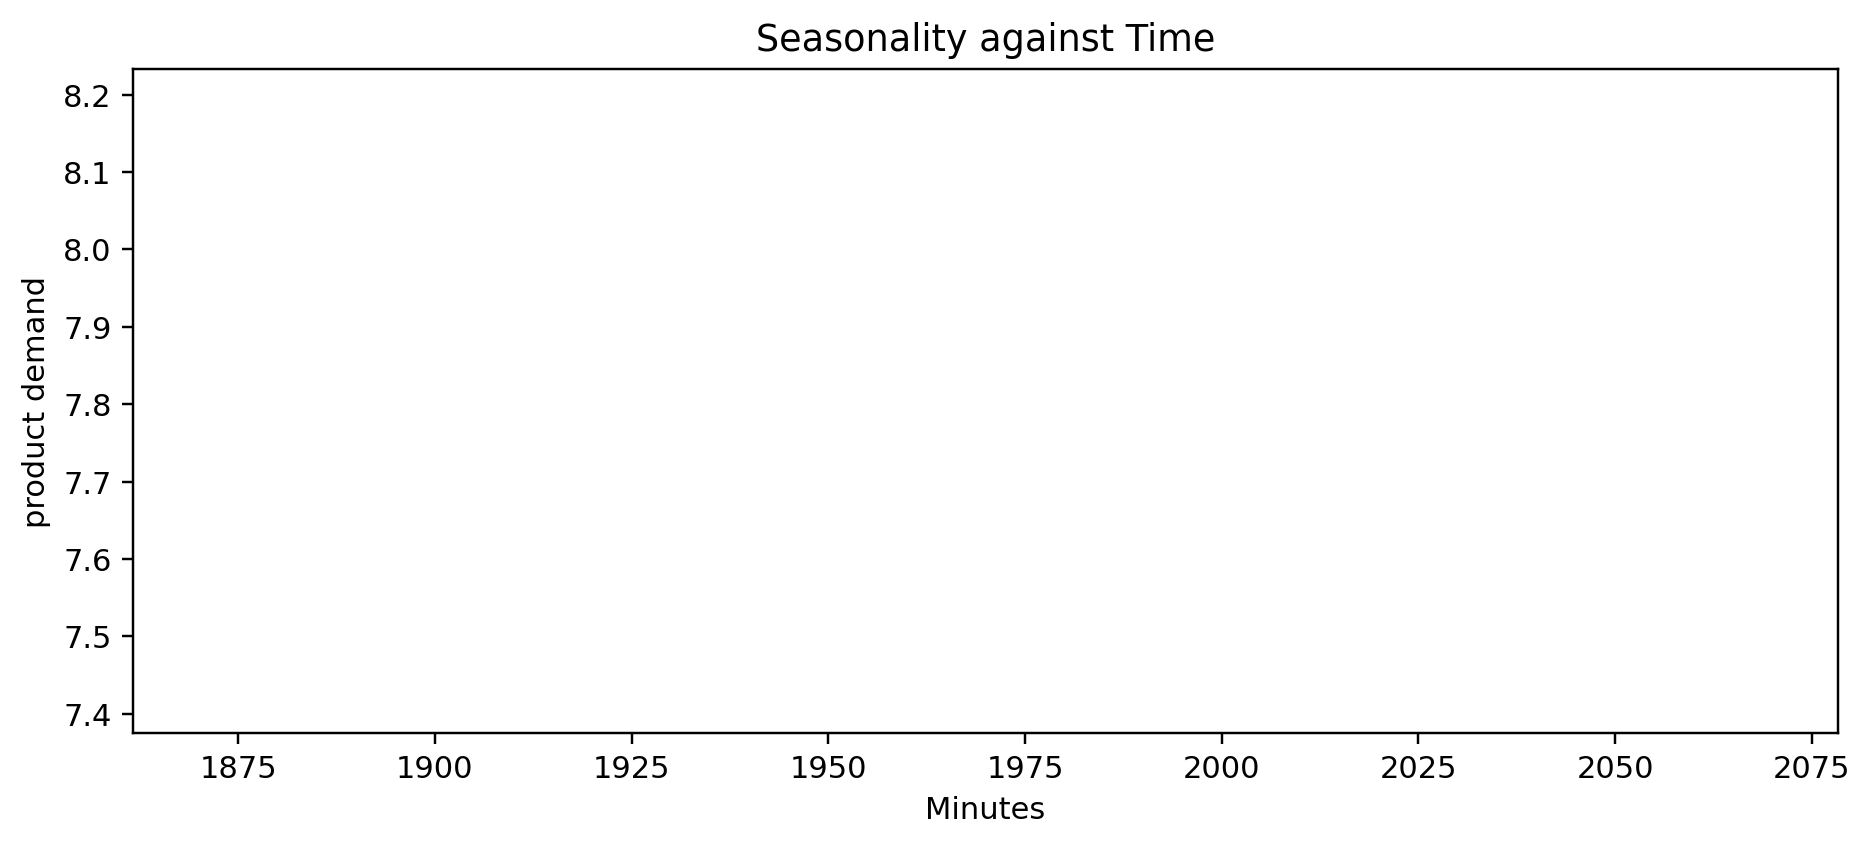

In [24]:
# creating the seasonality component
seasonality = 10 + np.sin(T_Series_for_sine) * 10

#plot the seasonality trend
plt.plot(T_Series_for_sine,  seasonality, 'b-.')
plt.title("Seasonality against Time")
plt.xlabel("Minutes")
plt.ylabel("product demand")

# Daily Min Temperatures

In [25]:
dmt = pd.read_csv('../Dataset/daily-min-temperatures.csv')
dmt.head(3)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


## 1. Multiple BoxPlot

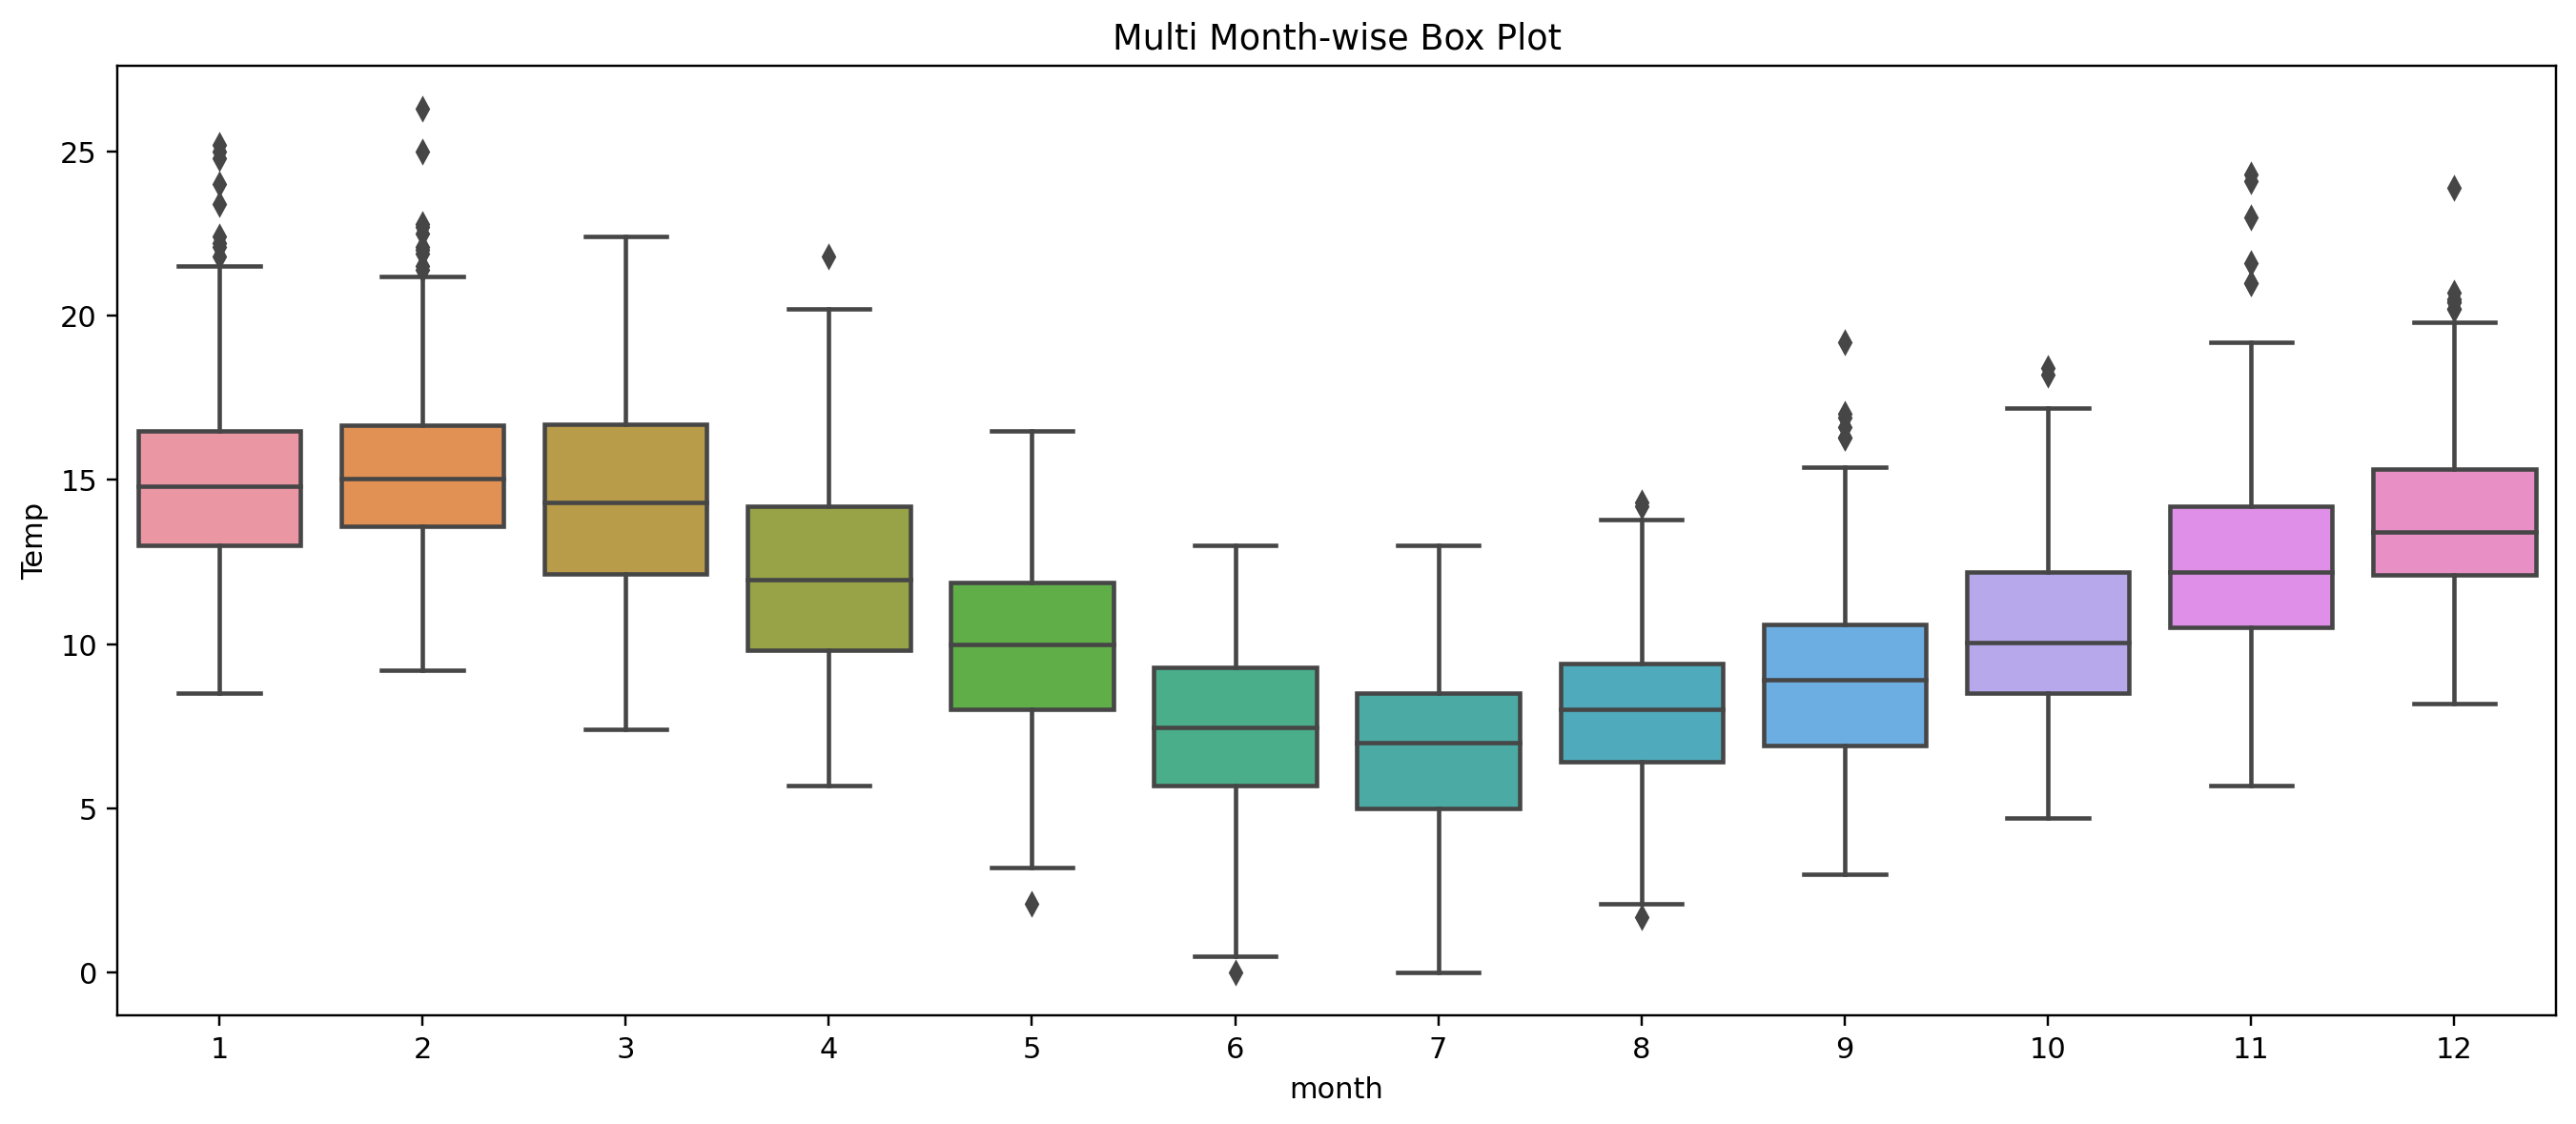

In [26]:
dmt['month'] = pd.to_datetime(dmt['Date']).dt.month
dmt['year'] = pd.to_datetime(dmt['Date']).dt.year
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='Temp', data=dmt).set_title("Multi Month-wise Box Plot")
plt.show()

## 2. Seasonality using Autocorrelation Plot 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

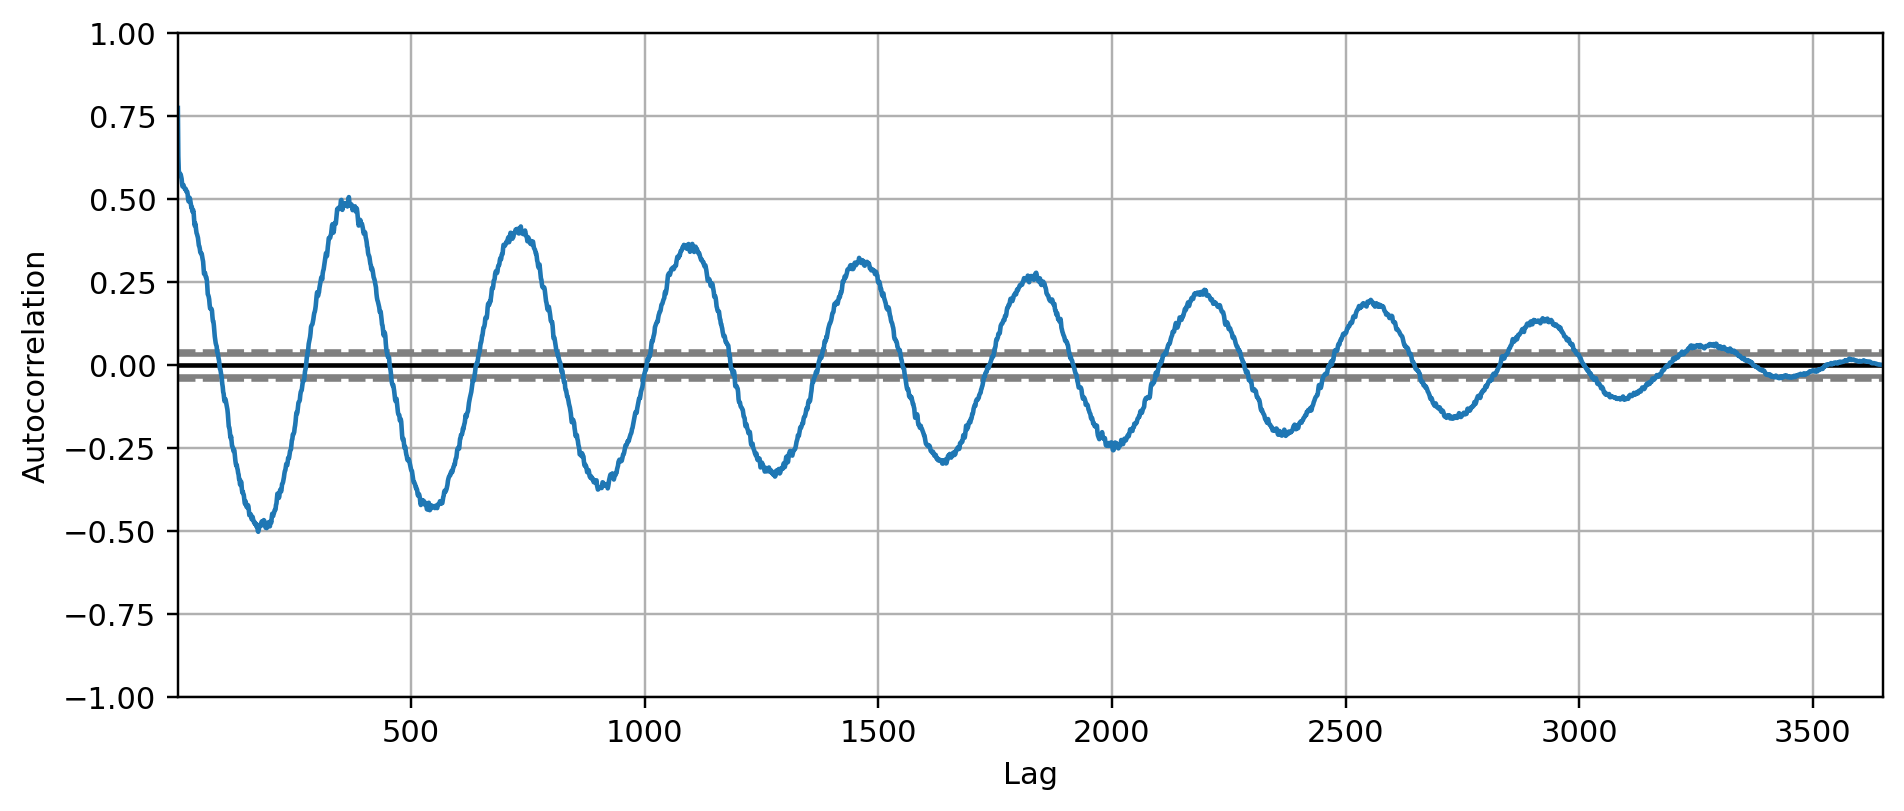

In [27]:
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':220})
autocorrelation_plot(dmt.Temp.tolist())

## 3. Deseasoning of Time-Series Data

Multiplicative seasonality is not appropriate for zero and negative values

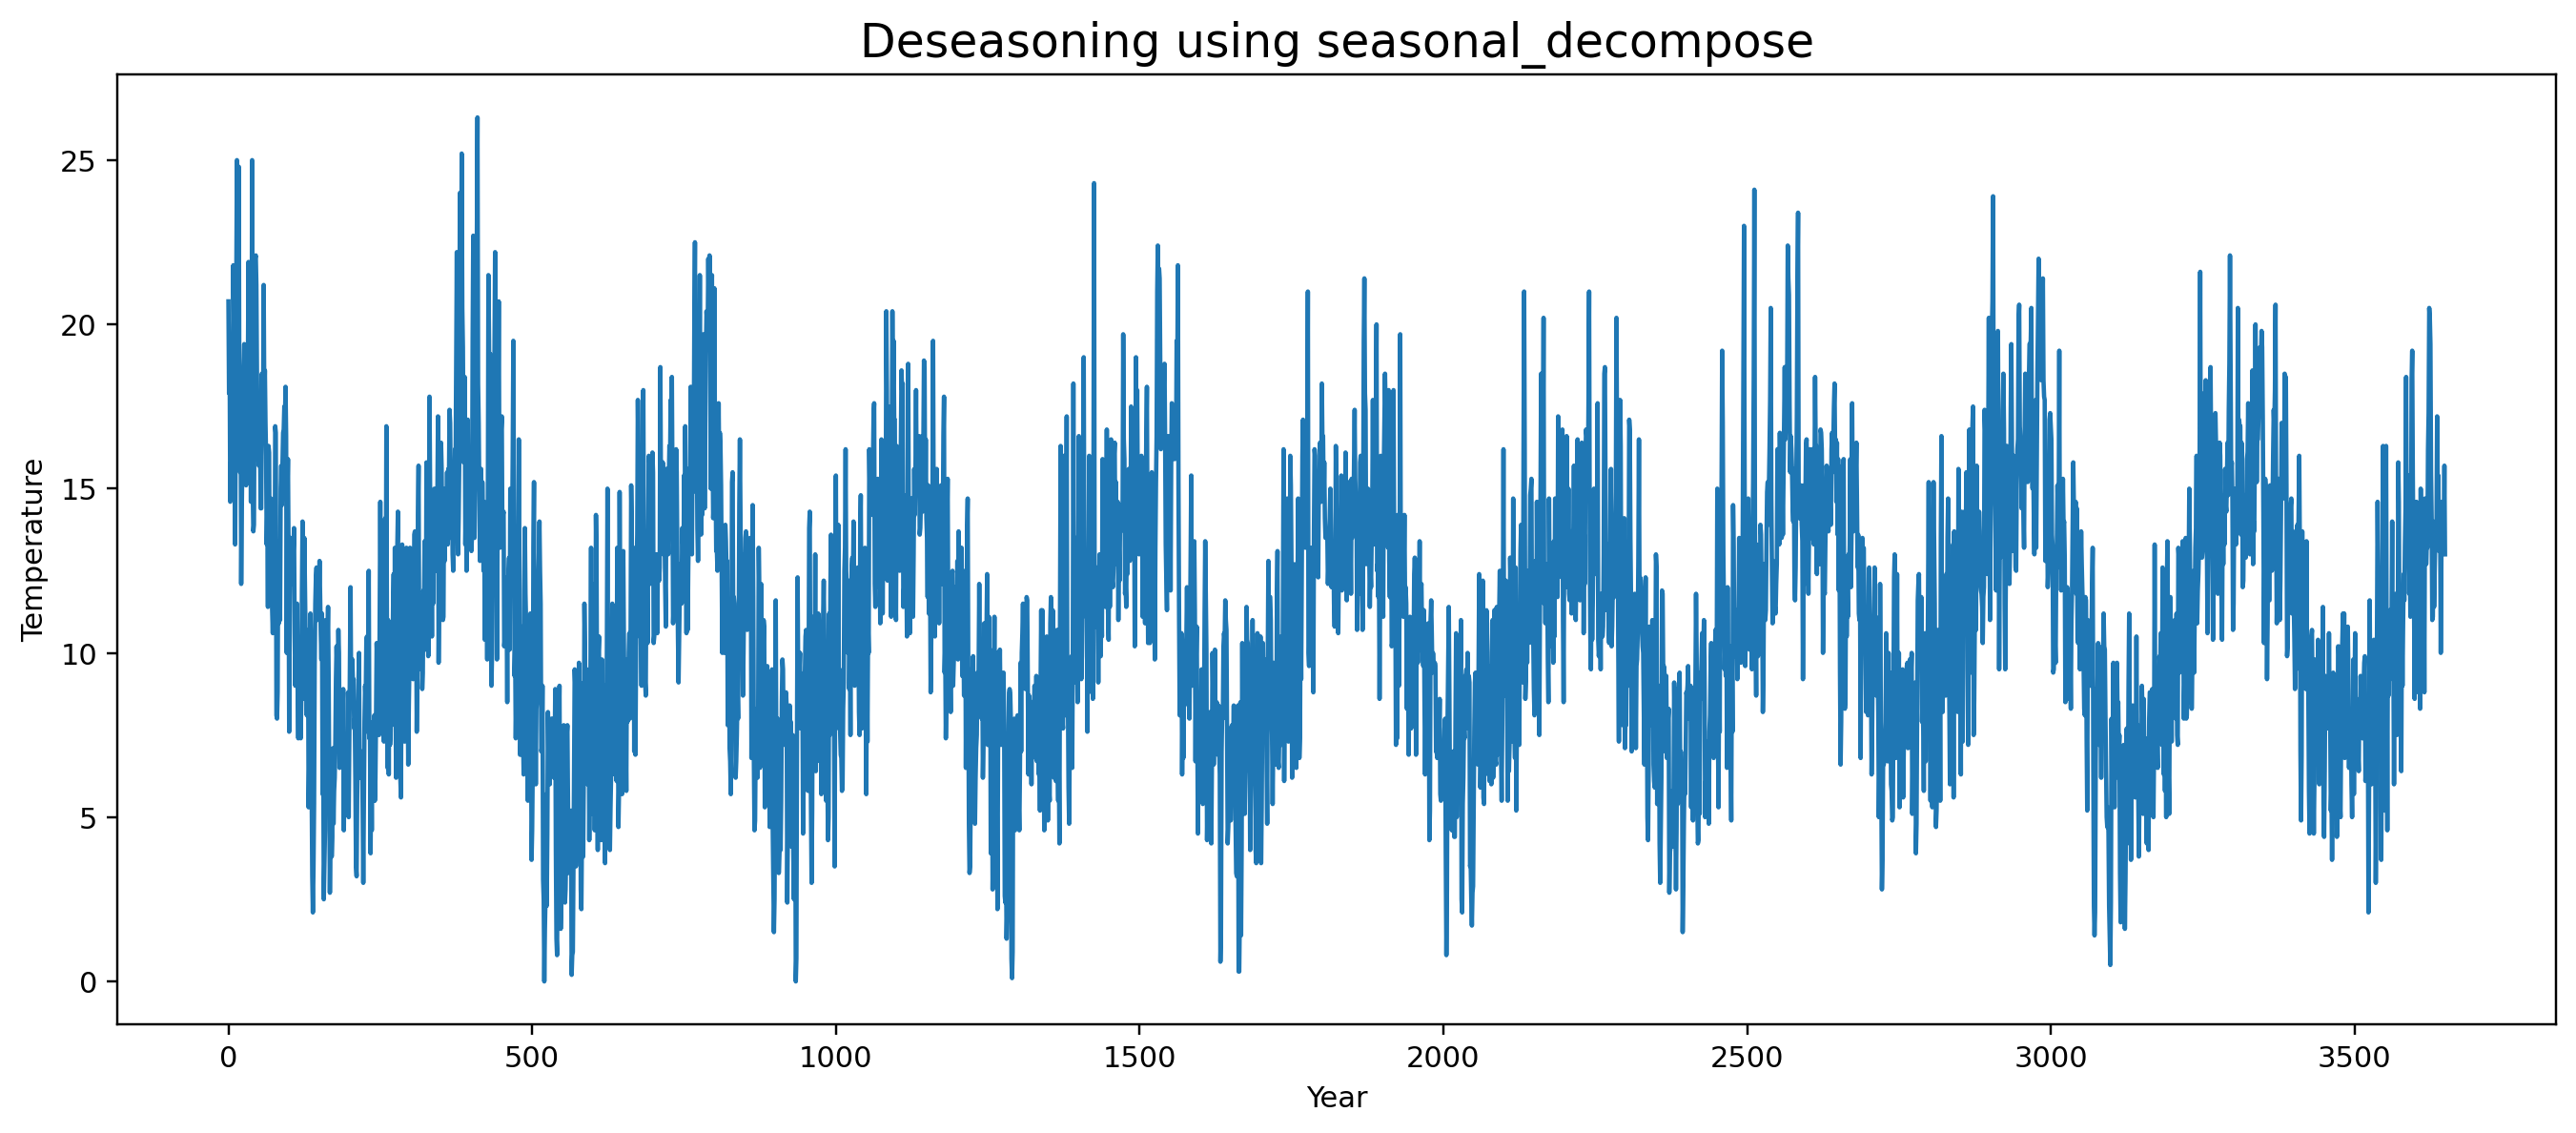

In [28]:
# additive
result_mul = seasonal_decompose(dmt['Temp'], model='additive', period=1)
deseason = dmt['Temp'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

## 4. Seasonal Decomposition

In [29]:
T_Series = dmt.Date
T_Series_for_sine = pd.to_datetime(dmt.Date).dt.year
Trend = dmt.Temp

Text(0, 0.5, 'Temperature')

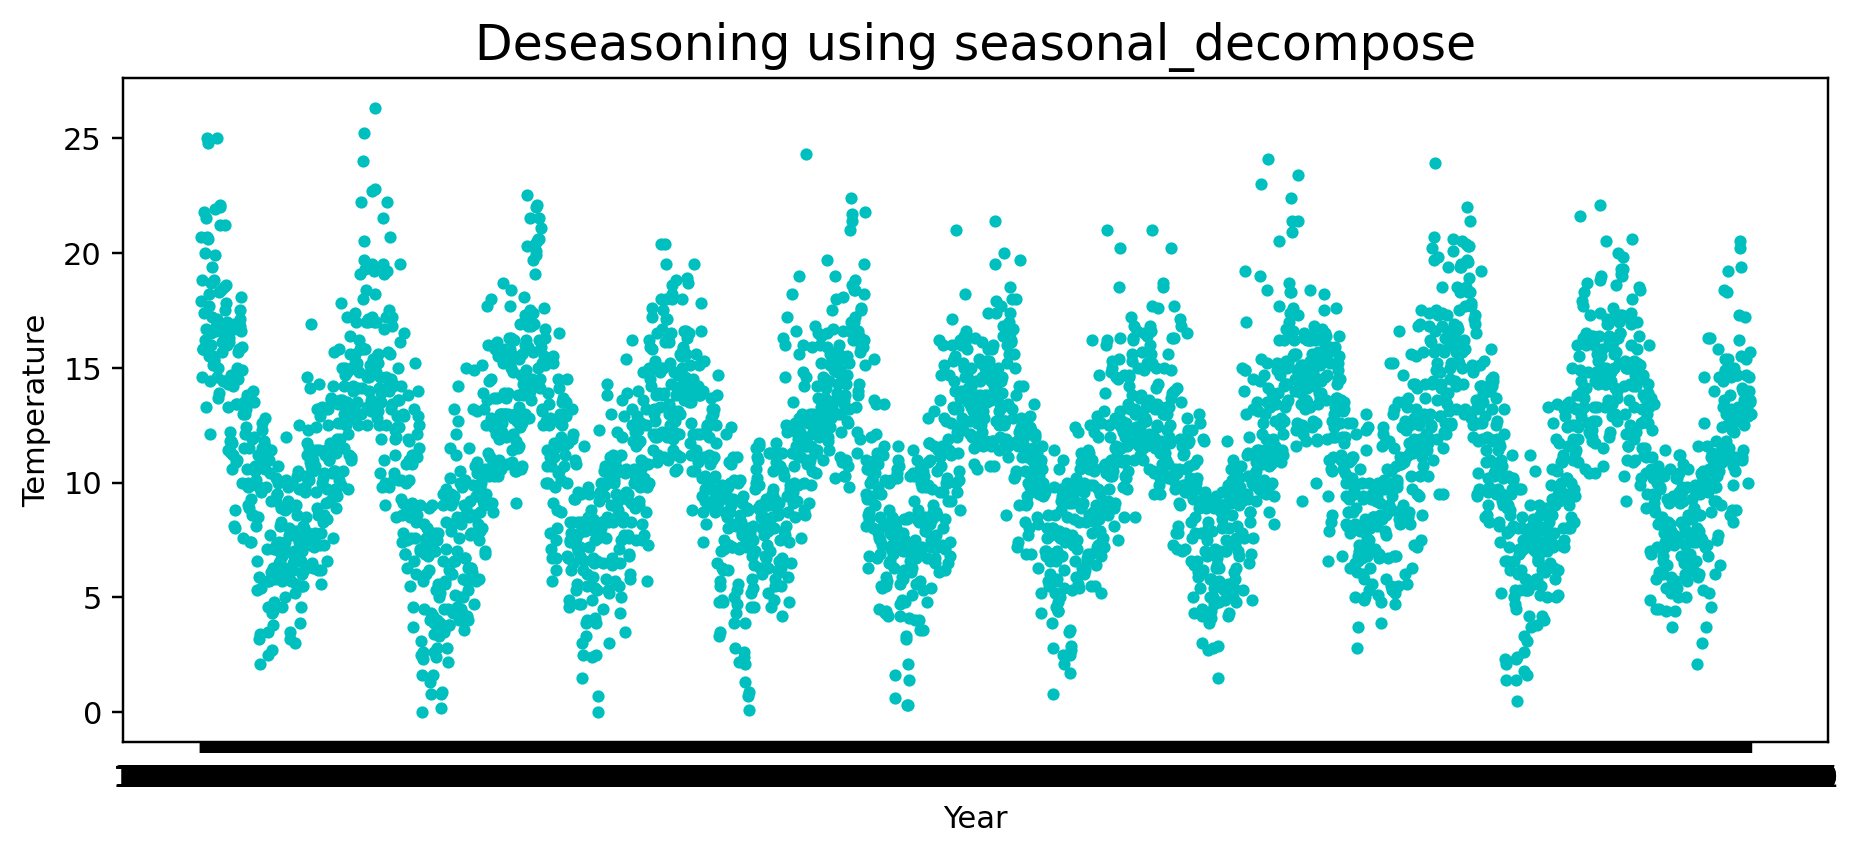

In [30]:
#plot the trend
plt.plot(T_Series, Trend, 'c.')
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

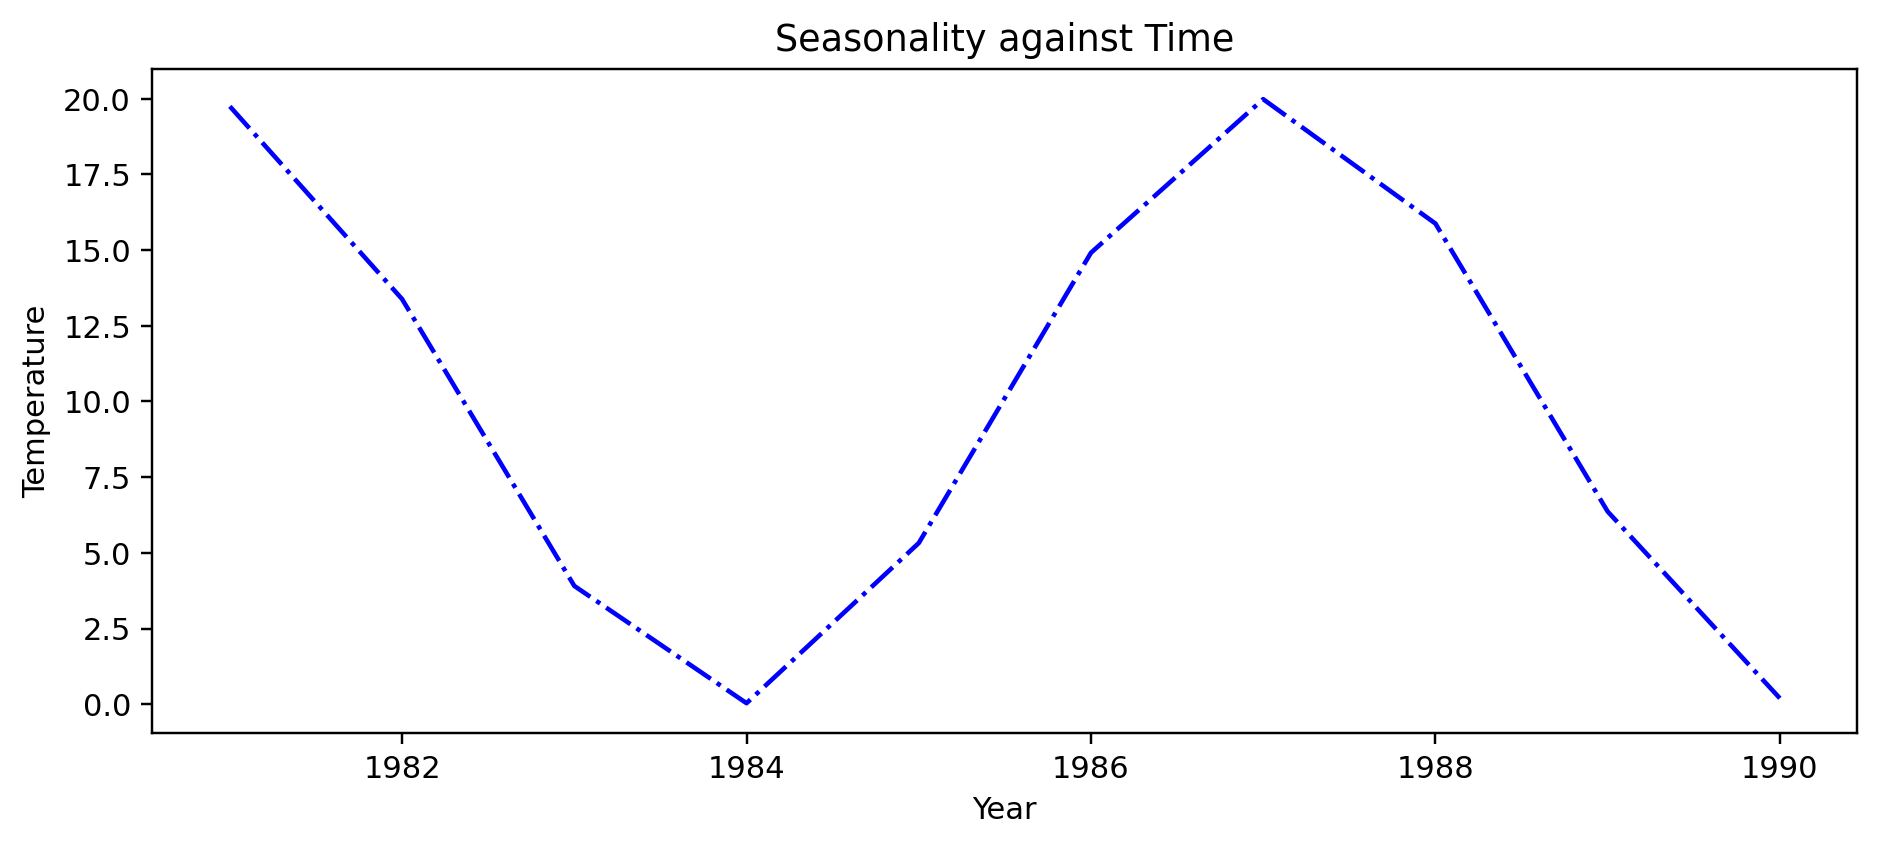

In [31]:
# creating the seasonality component
seasonality = 10 + np.sin(T_Series_for_sine) * 10

#plot the seasonality trend
plt.plot(T_Series_for_sine,  seasonality, 'b-.')
plt.title("Seasonality against Time")
plt.xlabel('Year')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

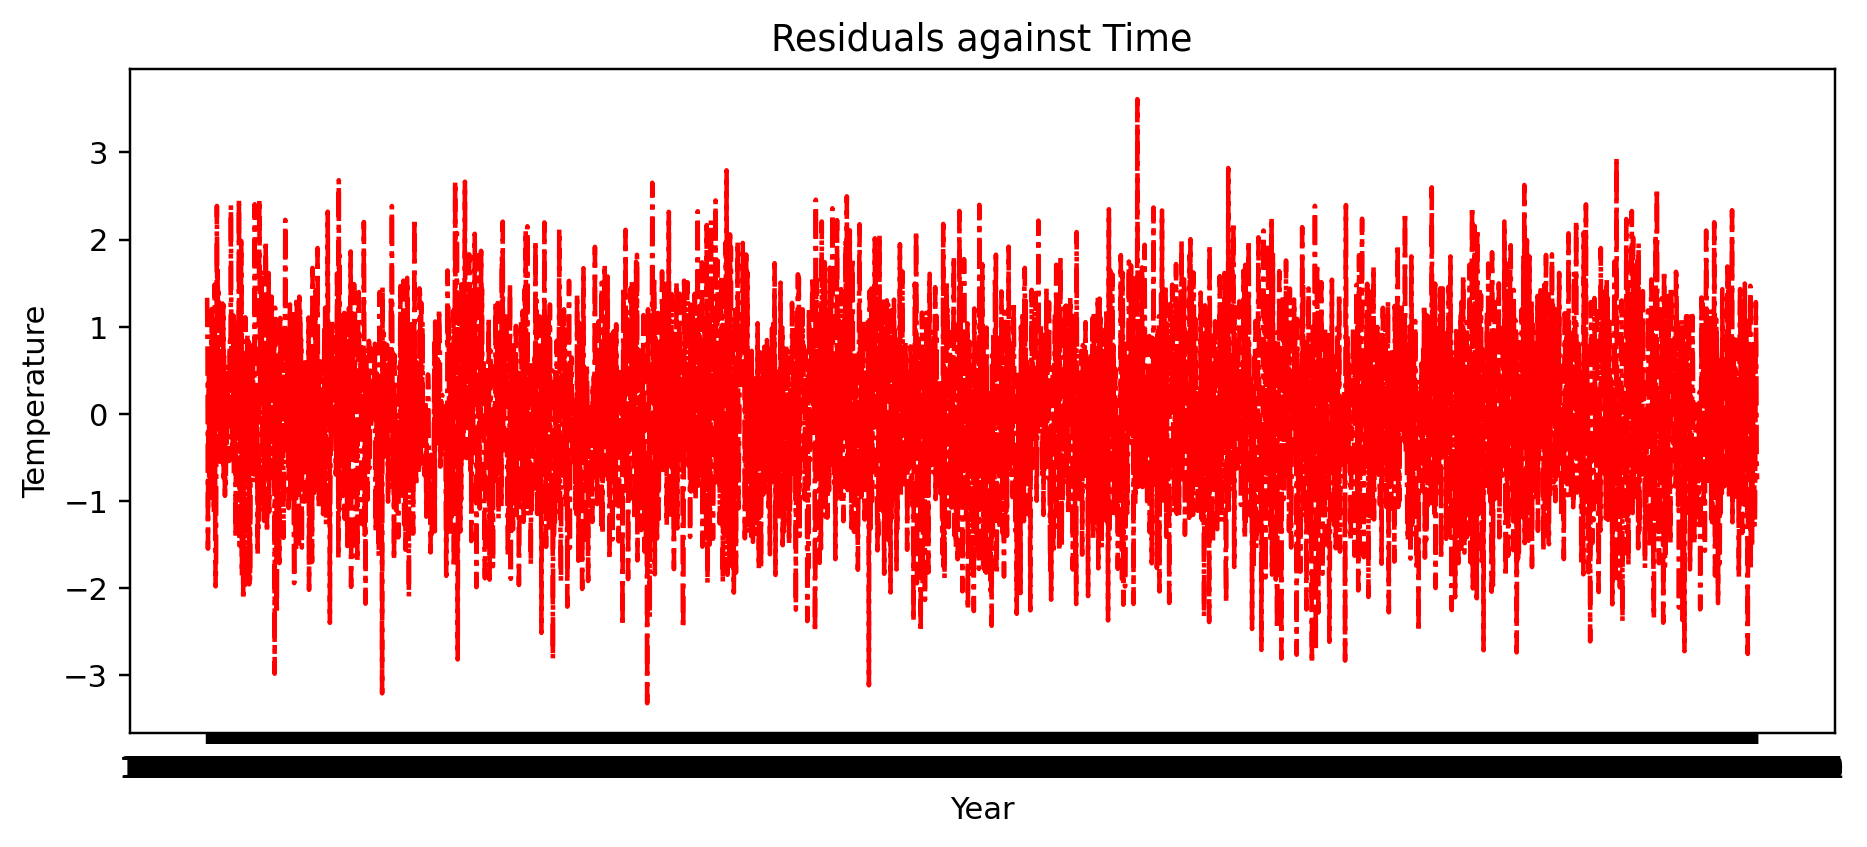

In [32]:
#creating the residual component
np.random.seed(10)  # for result reproducibility
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series))

#plot the residual component 
plt.plot(T_Series, residual, 'r-.')
plt.title("Residuals against Time")
plt.xlabel('Year')
plt.ylabel('Temperature')

# Microsoft stock

In [33]:
ms = pd.read_csv('../Dataset/Microsoft_Stock.csv')
ms.head(3)

,Date,Open,High,Low,Close,Volume
0,04-01-2015,40.60,40.76,40.31,40.72,36865322
1,04-02-2015,40.66,40.74,40.12,40.29,37487476
2,04-06-2015,40.34,41.78,40.18,41.55,39223692


## 1. Multiple BoxPlot

Text(0.5, 1.0, 'Multi Month-wise Box Plot')

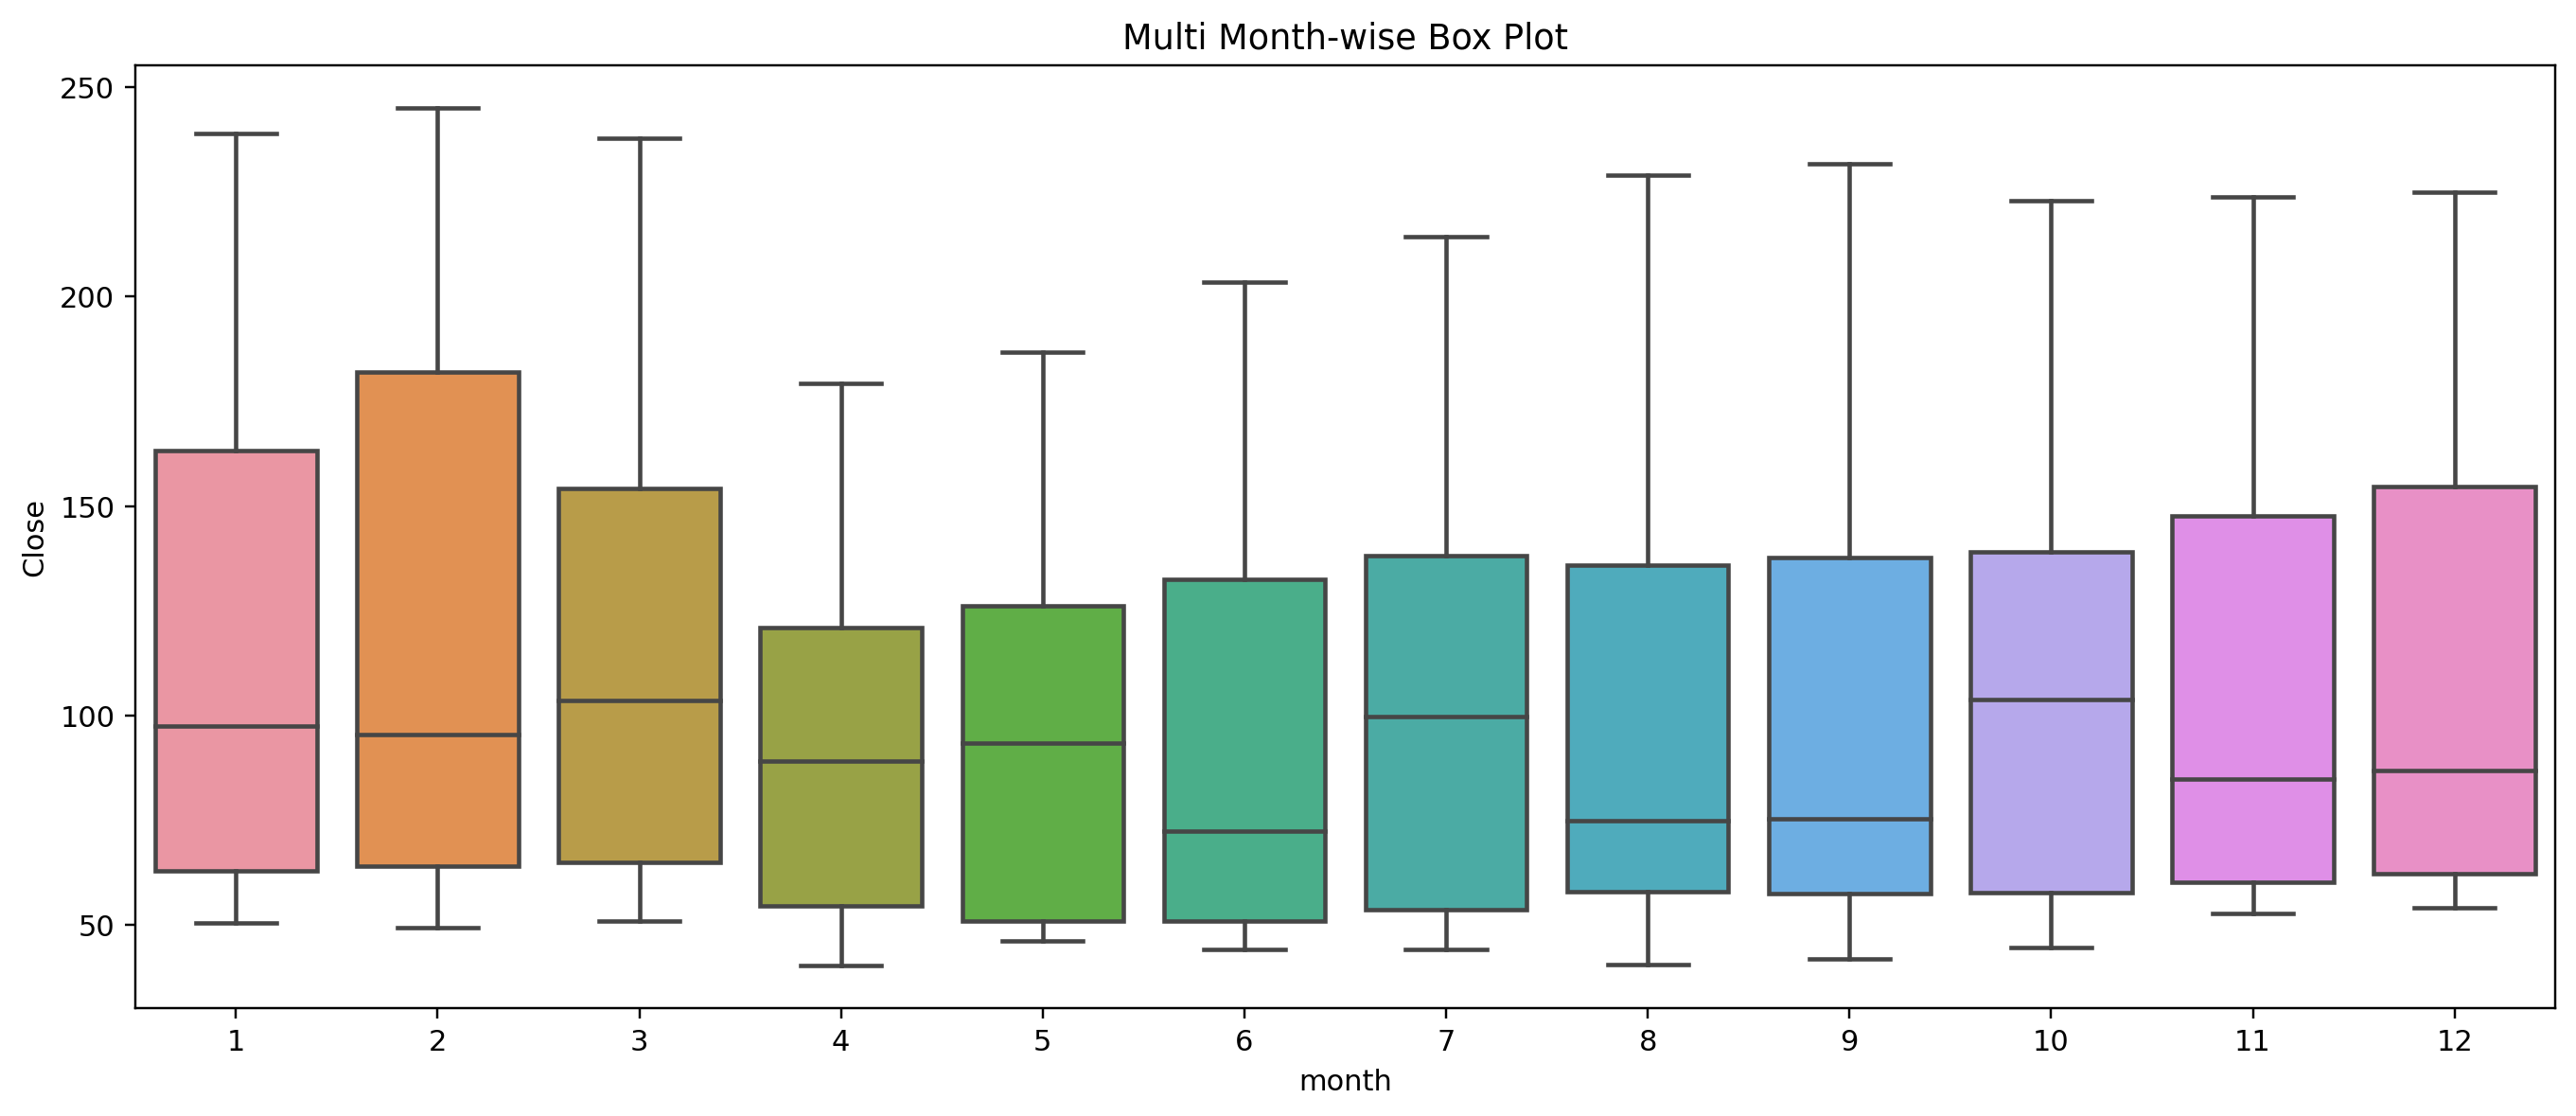

In [34]:
ms['month'] = pd.to_datetime(ms['Date']).dt.month
ms['year'] = pd.to_datetime(ms['Date']).dt.year
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='Close', data=ms).set_title('Multi Month-wise Box Plot')

## 2. Seasonality using Autocorrelation Plot 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

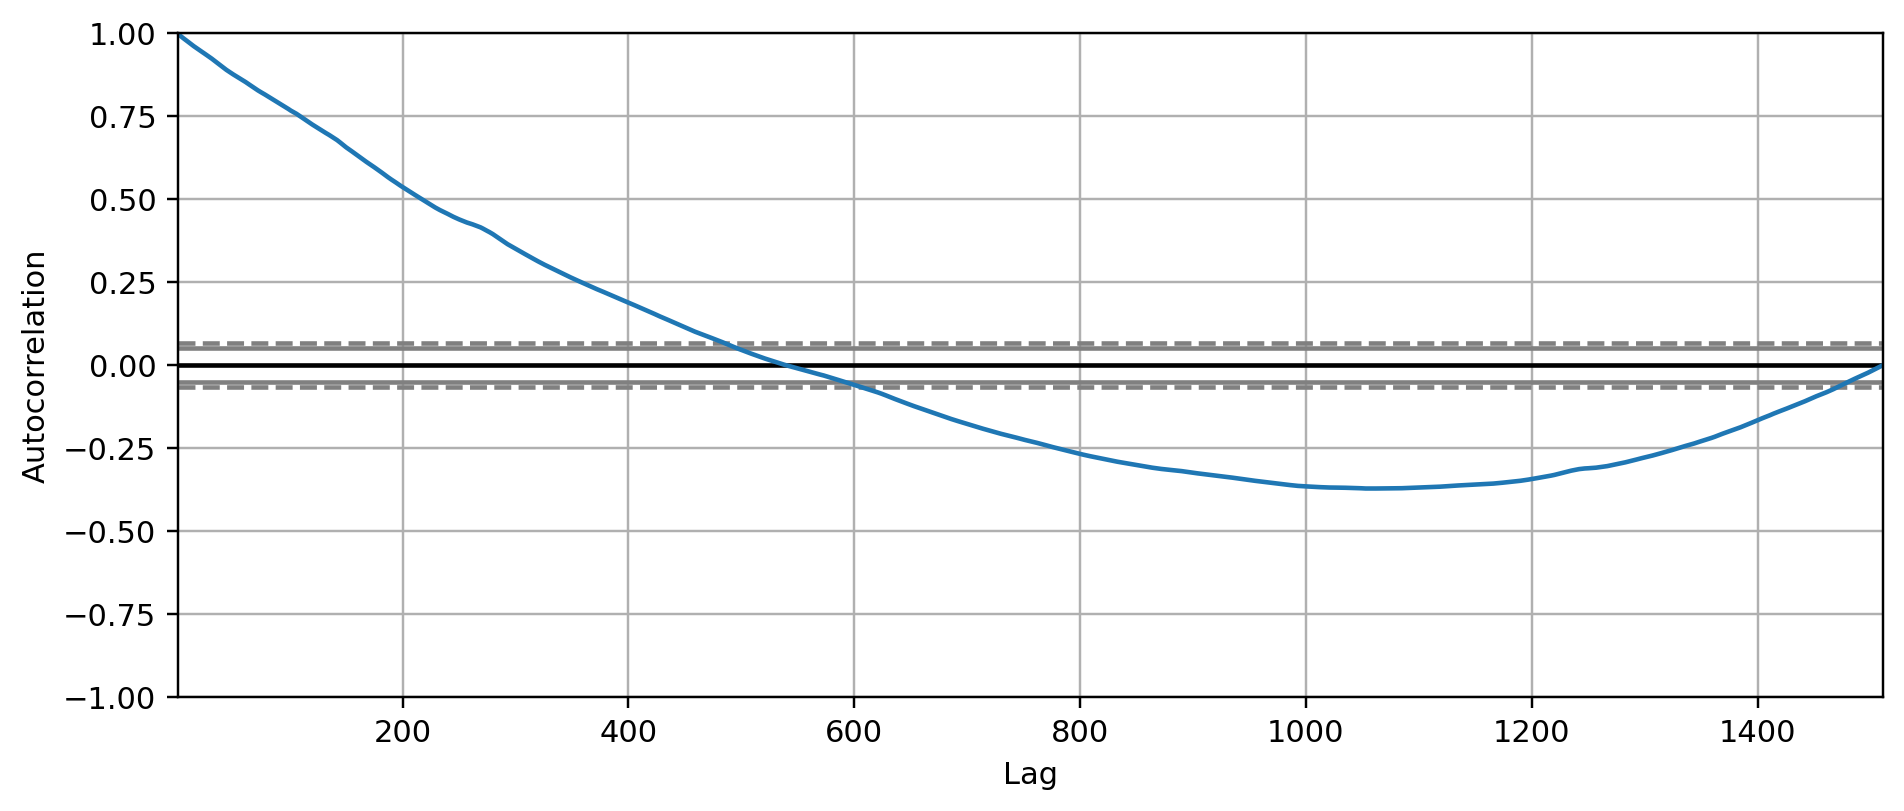

In [35]:
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':220})
autocorrelation_plot(ms.Close.tolist())

## 3. Deseasoning of Time-Series Data

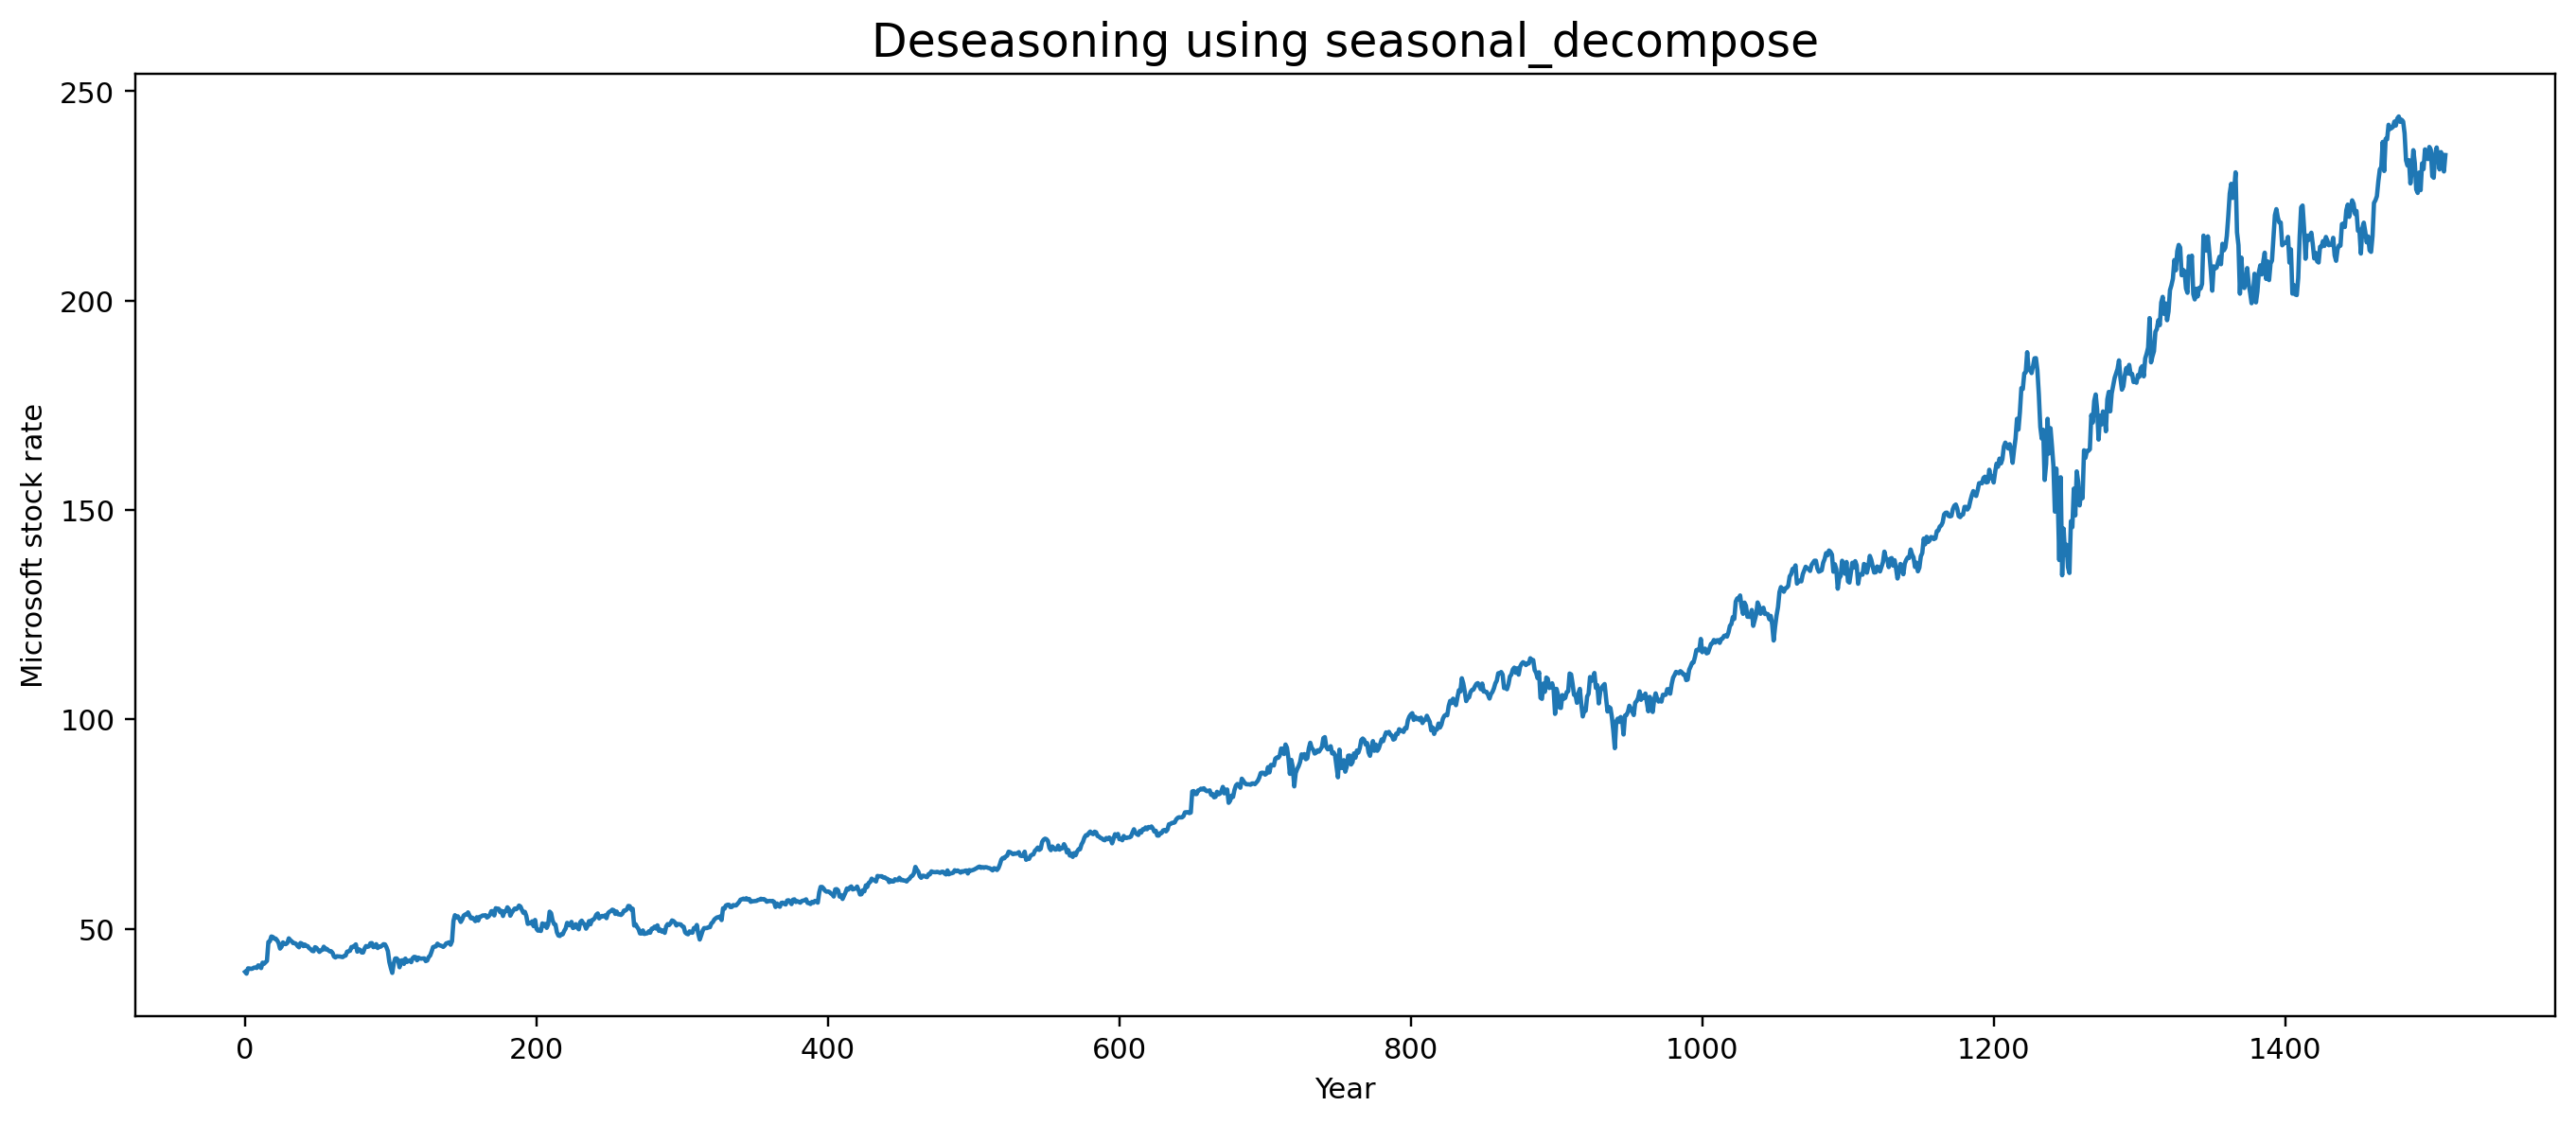

In [36]:
# Multiplicative
result_mul = seasonal_decompose(ms['Close'], model='multiplicative', period=1)
deseason = ms['Close'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Microsoft stock rate')
plt.show()

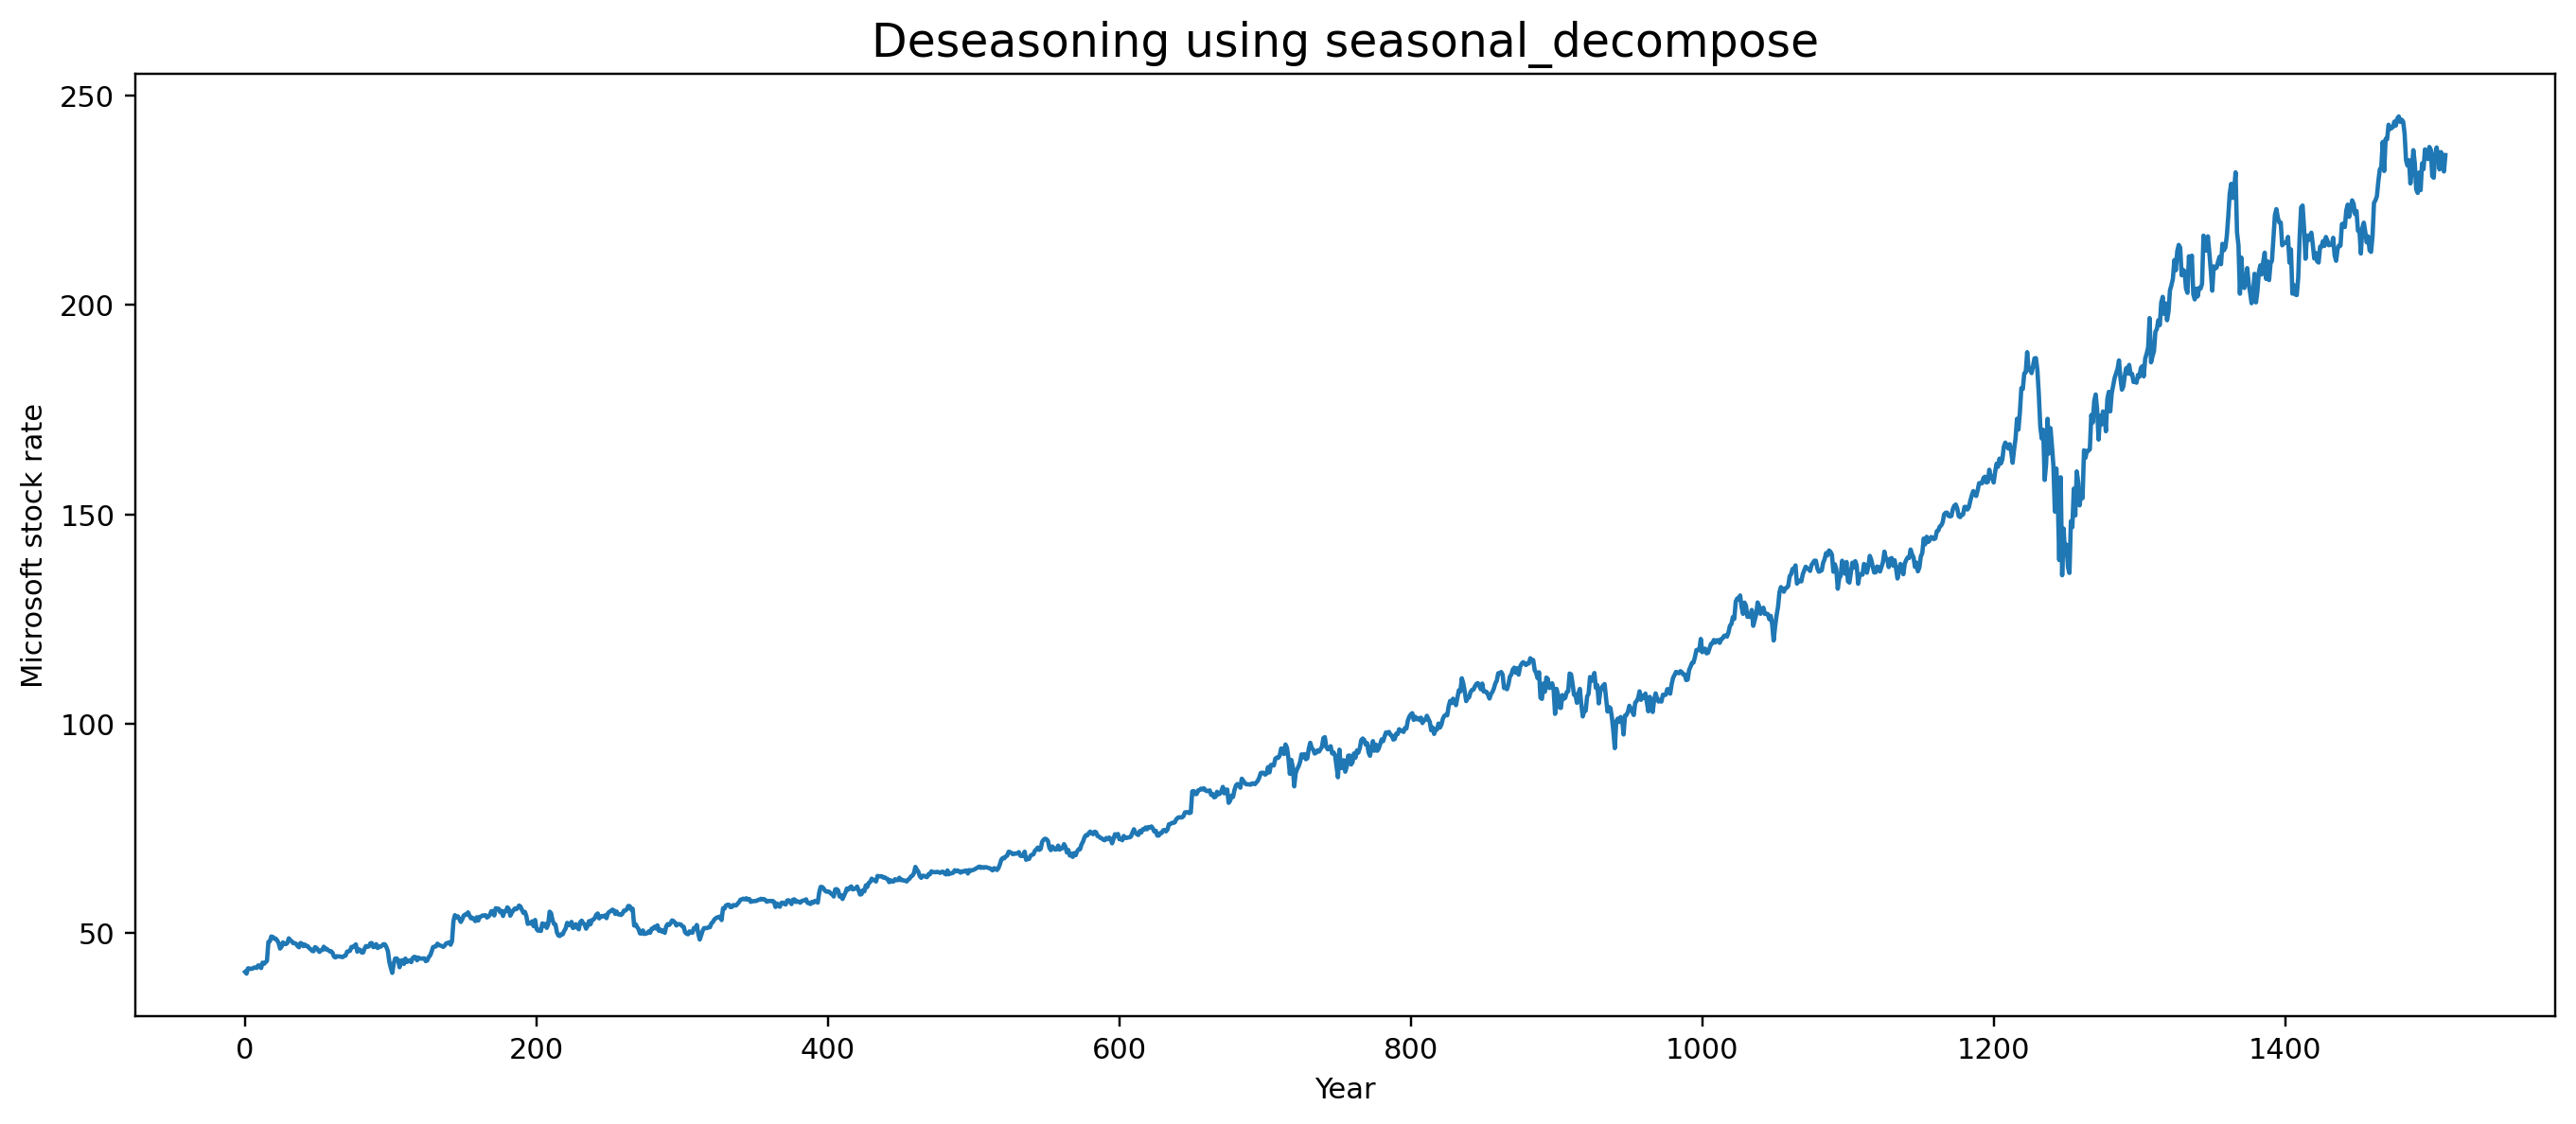

In [37]:
# Additive
result_mul = seasonal_decompose(ms['Close'], model='additive', period=1)
deseason = ms['Close'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Microsoft stock rate')
plt.show()

## 4. Seasonal Decomposition

In [38]:
T_Series = ms.Date
T_Series_for_sine = pd.to_datetime(ms.Date).dt.year
Trend = ms.Close

Text(0, 0.5, 'Microsoft stock rate')

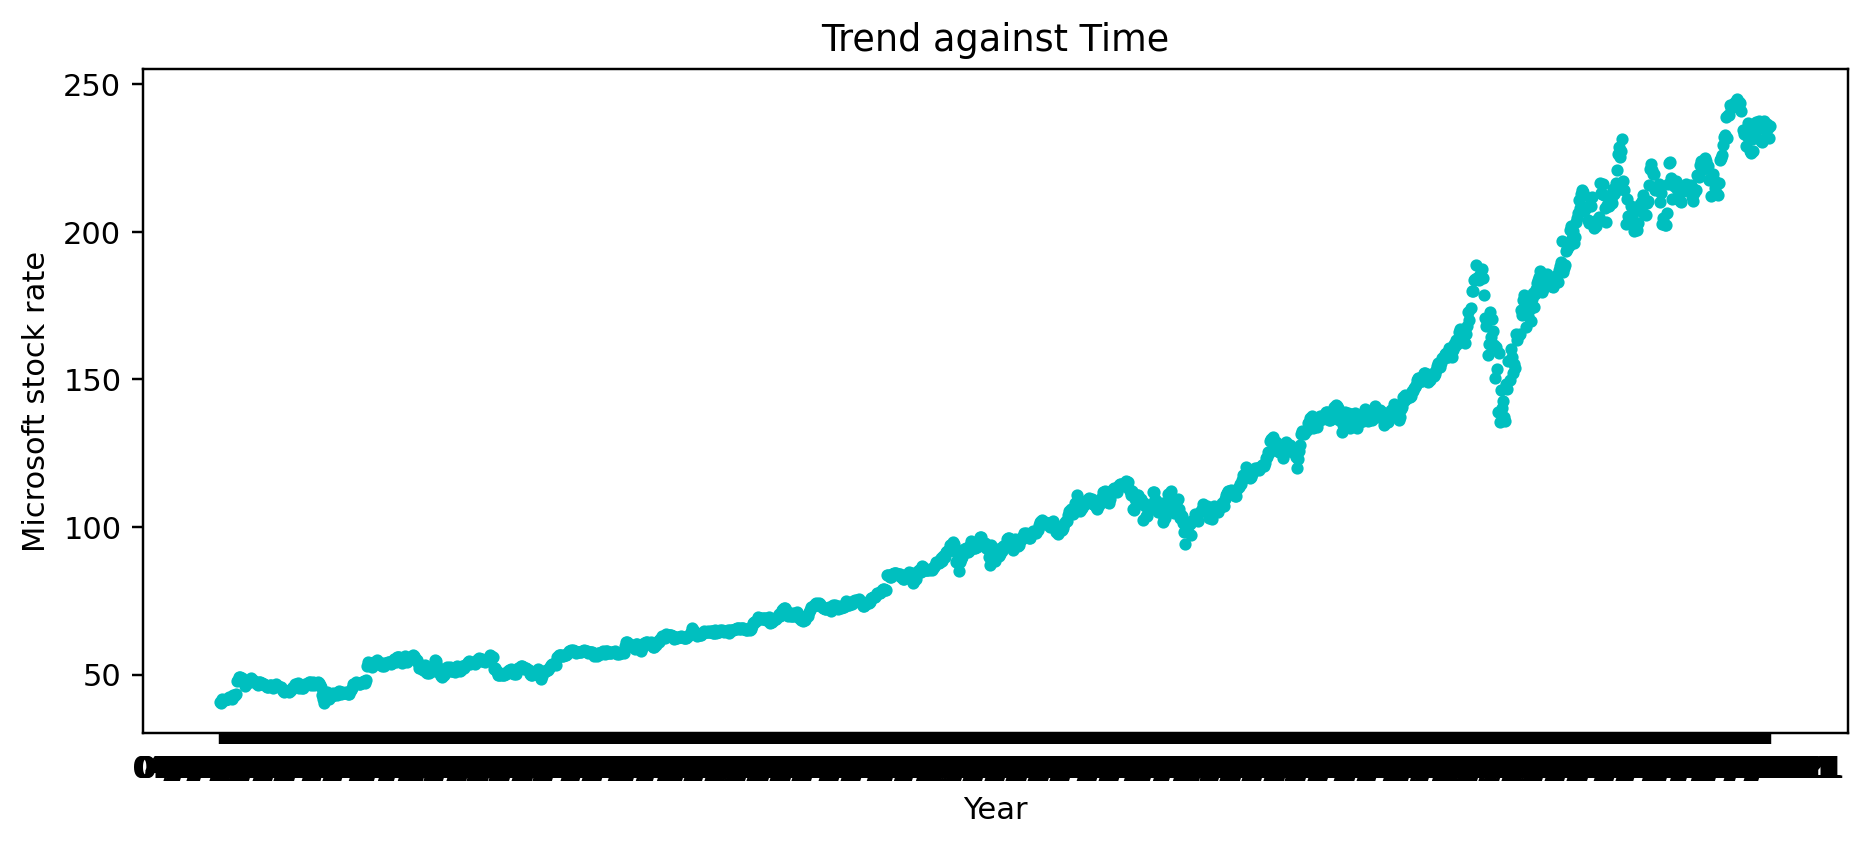

In [39]:
plt.plot(T_Series, Trend, 'c.')
plt.title("Trend against Time")
plt.xlabel('Year')
plt.ylabel('Microsoft stock rate')

Text(0, 0.5, 'Microsoft stock rate')

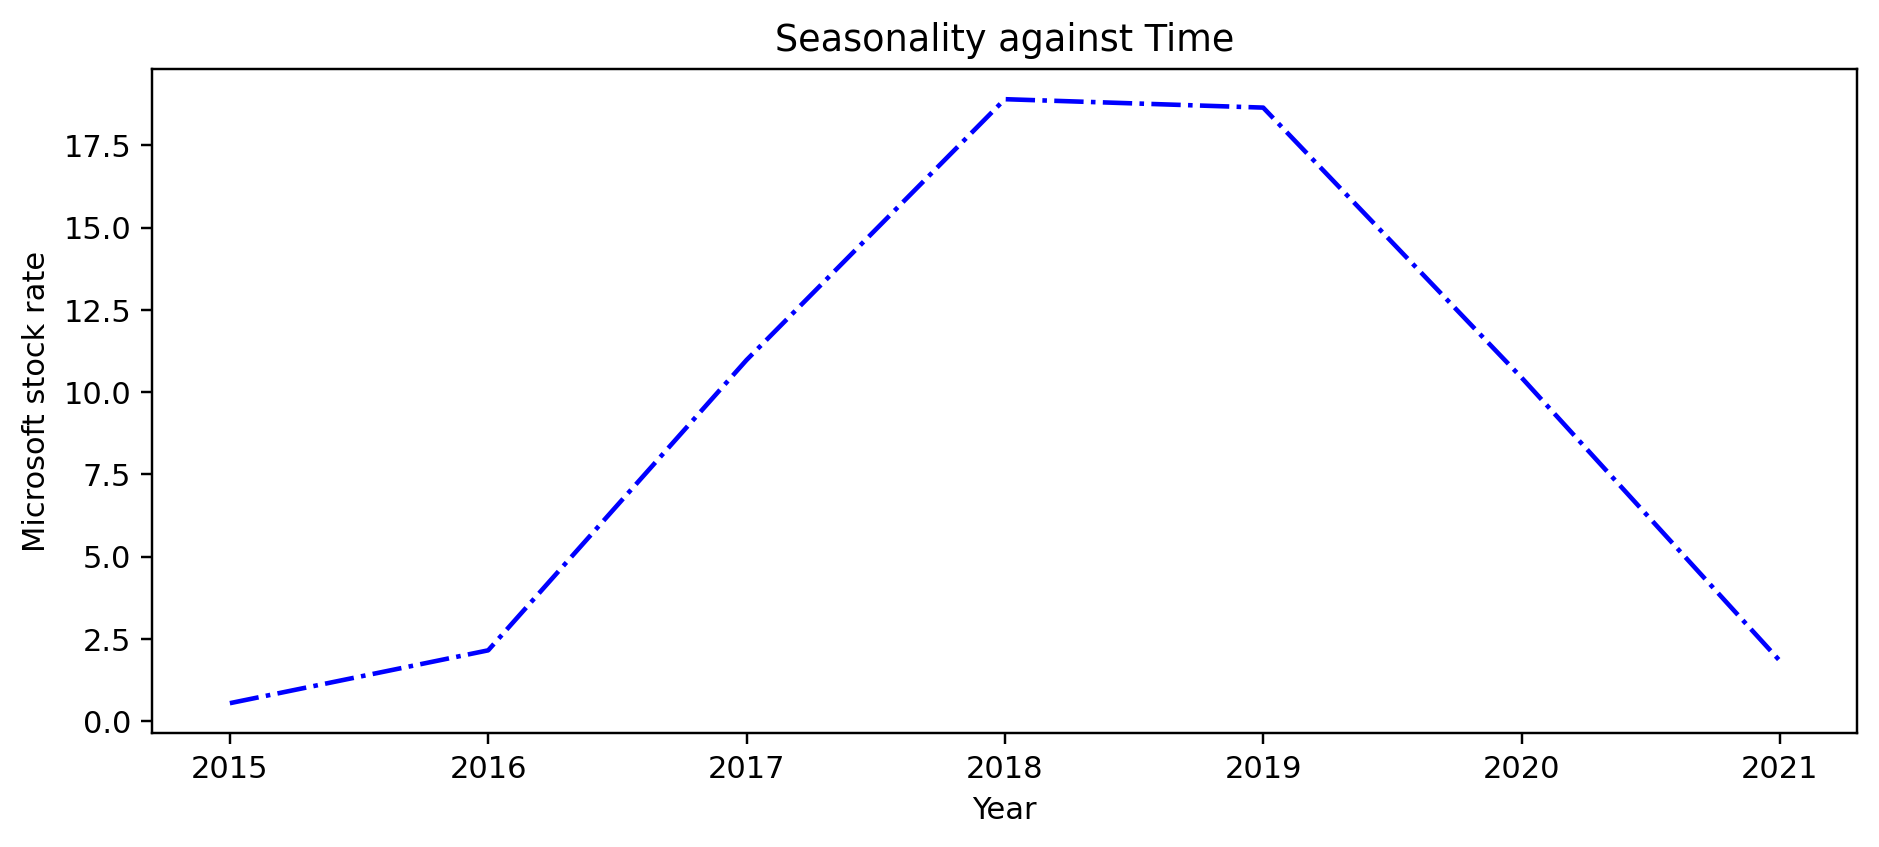

In [40]:
# creating the seasonality component
seasonality = 10 + np.sin(T_Series_for_sine) * 10

# plot the seasonality trend
plt.plot(T_Series_for_sine,  seasonality, 'b-.')
plt.title("Seasonality against Time")
plt.xlabel('Year')
plt.ylabel('Microsoft stock rate')

Text(0, 0.5, 'Microsoft stock rate')

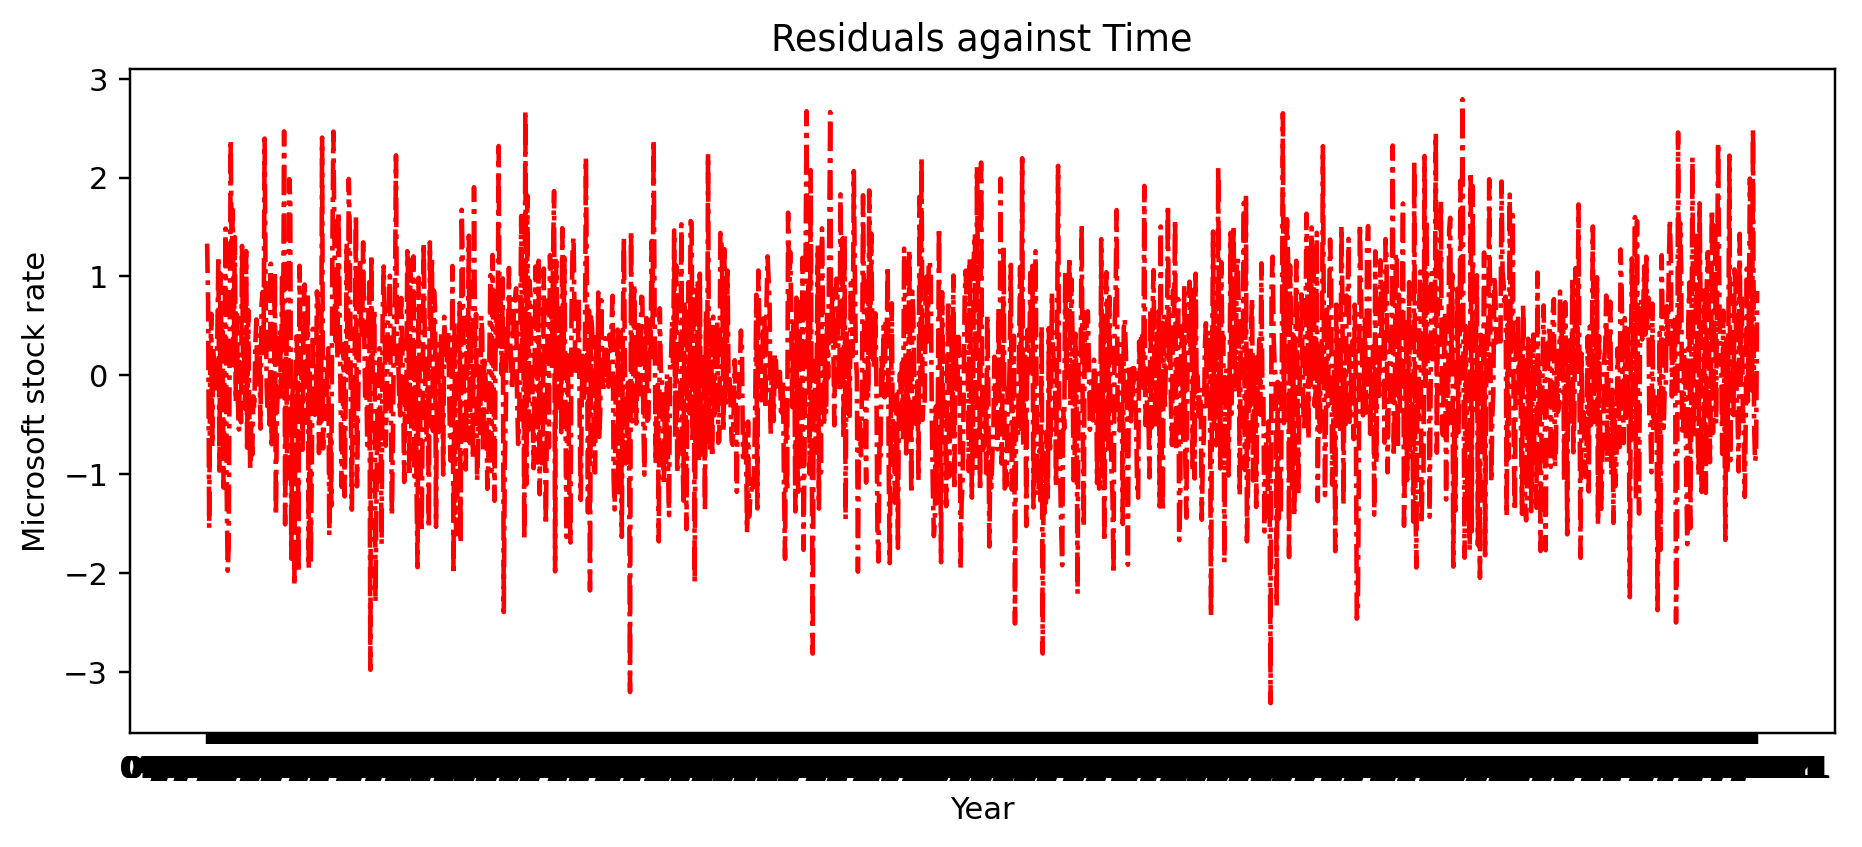

In [41]:
#creating the residual component
np.random.seed(10)  # for result reproducibility
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series))

#plot the residual component 
plt.plot(T_Series, residual, 'r-.')
plt.title("Residuals against Time")
plt.xlabel('Year')
plt.ylabel('Microsoft stock rate')

Text(0, 0.5, 'Microsoft stock rate')

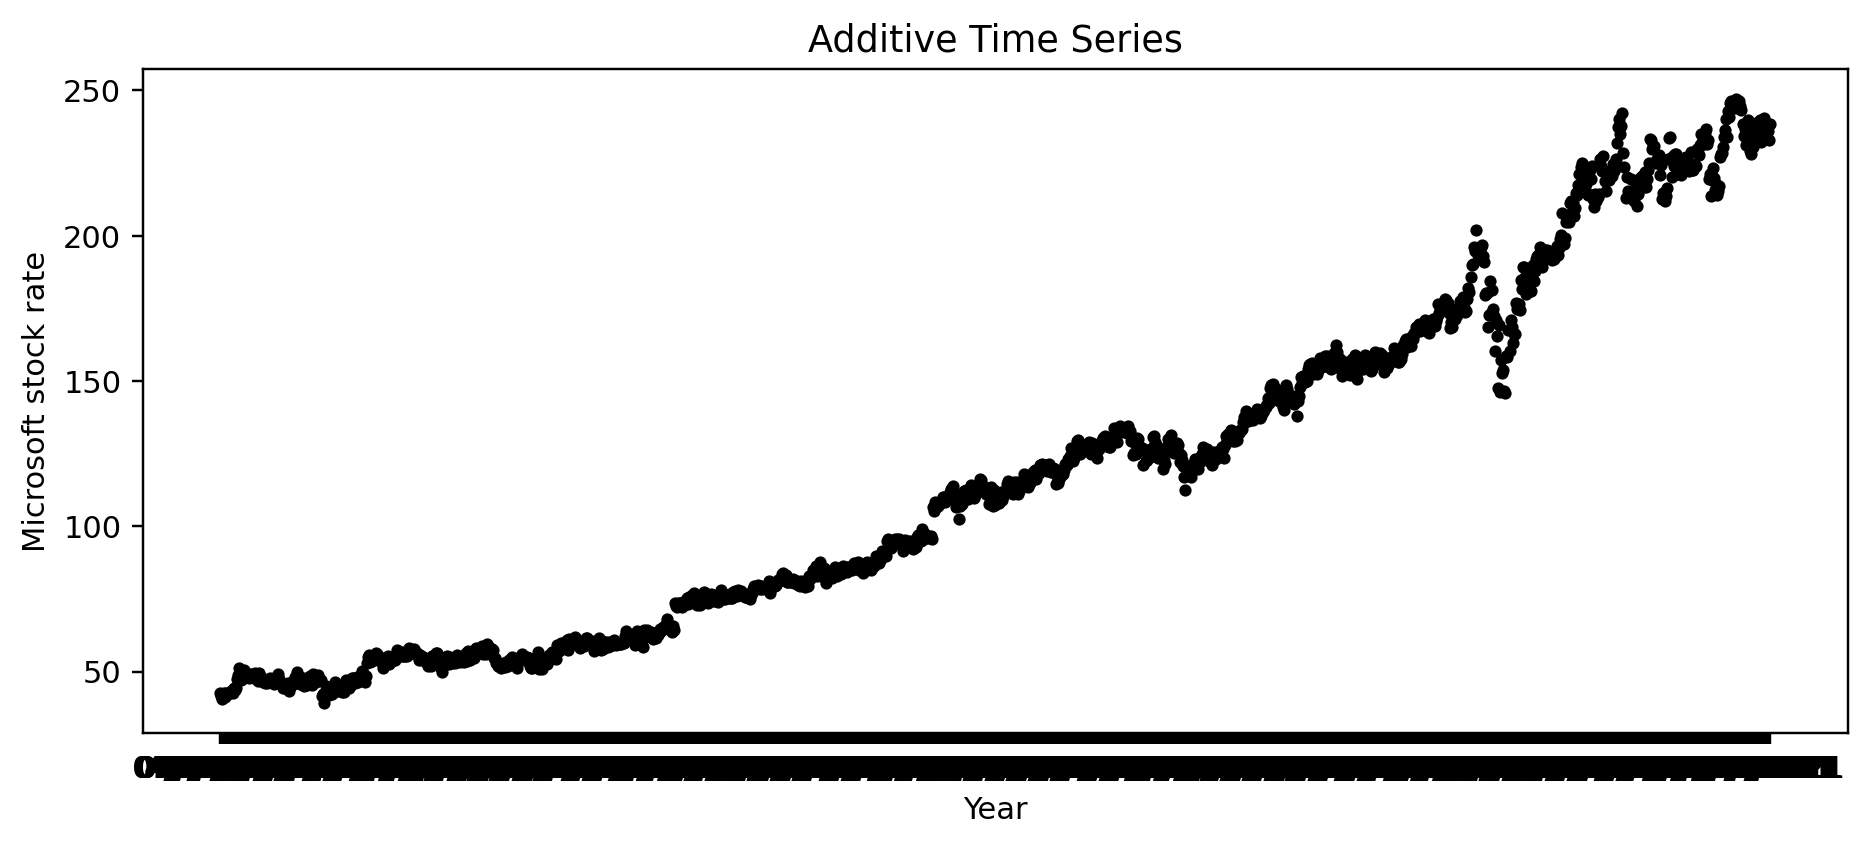

In [42]:
#create an additive model of our time series
additive_Tmodel = Trend + seasonality + residual

#Plot the additive model
plt.plot(T_Series, additive_Tmodel, 'k.')
plt.title("Additive Time Series")
plt.xlabel('Year')
plt.ylabel('Microsoft stock rate')

Text(0, 0.5, 'Microsoft stock rate')

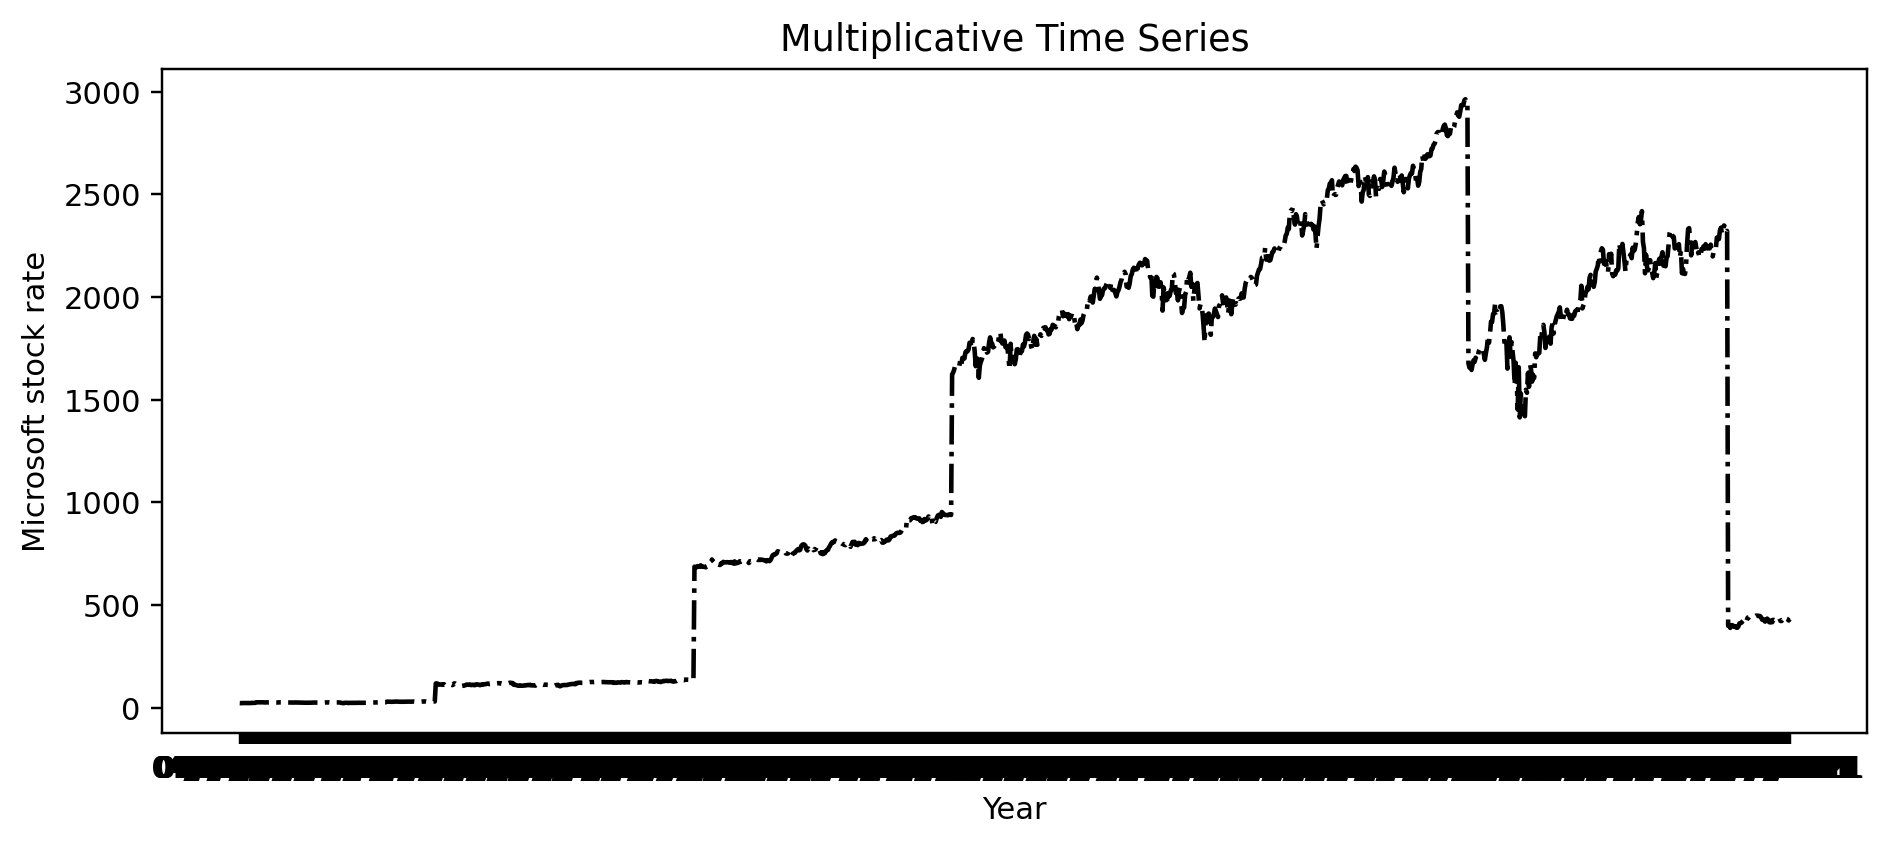

In [43]:
#create a multiplicative time series
# we ignore residual to make the pattern more apparent
ignored_residual = np.ones_like(residual)
# we multiply other components to create a multiplicative time series
multiplicative_Tmodel = Trend * seasonality * ignored_residual

#Plot the multiplicative model
plt.plot(T_Series, multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel('Year')
plt.ylabel('Microsoft stock rate')